In [1]:
# https://stackoverflow.com/questions/49429585/how-to-change-the-background-color-of-a-single-cell-in-a-jupyter-notebook-jupy
from IPython.core.magic import register_line_magic
from IPython.display import HTML, display
import json

@register_line_magic
def bg(color, cell=None):    
    script = (
        "var n = [this.closest('.cell,.jp-CodeCell')];"
        "n = n.concat([].slice.call(n[0].querySelectorAll('.input_area,.highlight,.jp-Editor')));"
        f"n.forEach(e=>e.style.background='{color}');"
        "this.parentNode.removeChild(this)"
    )
    display(HTML(f'<img src onerror="{script}" style="display:none">'))  

# **Integrated CA2**:  
## Ireland's Global Trading Analysis, Compare Ireland & Similar Countries to Product Analysis

*Lecturers:* Sam Weiss, John O’Sullivan/Marina Iantorno, Muhammad Iqbal, David McQuaid

*Student:* Fatime Reisenleitner [2020491]

For this analysis, I have used FAOSTAT datasets which have proven to be too big to handle. So I have extracted the relevant data from it and cleaned it. This way I could reduce it by multiple Gigabytes. Please see `0.Big Data Extraction` notebook for the full process.


## **1. Business Understanding:**
### Objectives:

I have been tasked to **analyse Ireland**’s Agricultural data and comparing the Irish **Agri sector with other countries** worldwide. Analysing **forecasting**, **sentiment analysis** and evidence based **recommendations** for **at least 2 areas** of the sector as well as a complete rationale of the entire process used to discover my findings (such as trends and correlations…) from globally recognised **official sources**. As it is discussed in Data Gathering, I decided to research animal stock(**Beef, Pigmeat, Eggs and Poultry, Sheep and goat meat, Milk and dairy products (excluding Cheese?), fruit and vegetables (Apples and Tomatoes)** in the agricultural sector. This should assist decision making for Irish farmers.

## **2. Data Understanding:**

### **Data Collection:**
#### **Data Sources:**
**`FAOSTAT`**<br>
Food and Agriculture Organization of the United Nations,Viale delle Terme di Caracalla, 00153 Rome, Italy<br>
T:(+39)06 570 55303

faostat@fao.org


**`ISO`**<br> 
International Organization for Standardization, ISO Central Secretariat, Chemin de Blandonnet 8, CP 401 - 1214 Vernier, Geneva, Switzerland<br>
E-mail: central@iso.org<br>
Tel.: +41 22 749 01 11<br>
Fax: +41 22 733 34 30<br>

<hr>

#### **Datasets:** 
**`_TradeAnalysis`**<br>
Created using the `Trade_DetailedTradeMatrix_E_All_Data_(Normalized).csv` from the FAOSTAT Database gathered from their website (https://www.fao.org/faostat/en/#home) and initialised for the analysis in the `0.Big Data Extraction` notebook.

**`_PriceAnalysis`**<br>
Created using the `Prices_E_All_Data_(Normalized).csv` from the FAOSTAT Database gathered from their website (https://www.fao.org/faostat/en/#home) and initialised for the analysis in the `0.Big Data Extraction` notebook.

**`_ISO-3166`**<br>
Contains the national standards from the ISO official website (https://www.iso.org/home.html).


#### **Licensing:**
Please find in the Report.

### **Data Description:**
To analyse the data, I conducted initial analysis on the dataset that can be seen step-by-step below. 

#### Import Modules
The required packages are imported for analysis.

In [4]:
 #!pip install plotly#==5.5.0

In [5]:
# Import Modules
try:
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns

    import numpy as np
    
    import statistics as st # Statistical Module(in Standard Library)
    import researchpy as rp
    
    import warnings
    warnings.filterwarnings("ignore")
except ModuleNotFoundError:
    !pip install seaborn numpy matplotlib researchpy plotly

#### Loading the Datasets
Takes a couple of seconds to load in the dataset. Huge improvement from the minutes it took before initial cleaning.

In [6]:
%%time
df = pd.read_csv("./Data/_TradeAnalysis.csv",encoding = 'utf-16',sep='\t')#latin'utf-16',on_bad_lines='skip')#,lineterminator='\n')#,encoding_errors='replace')#,error_bad_lines=False)#)encoding="windows-1252"
df_iso = pd.read_excel("./Data/_ISO-3166.xlsx")#sheet_name=0, header=0, names=None, index_col=None, usecols=None)

CPU times: total: 5.42 s
Wall time: 5.46 s


### Preprocessing
<div class="alert alert-block alert-info"> <b>NOTE:</b> Please see <u>0.Big Data Extraction</u> notebook for further preprocessing data cleaning more specifically handling missing, duplicate, irrelevant data etc.</div>

####  **`Dirty Data`**
Any Trade Value that is worth less than or equal to 0 can be considered 'dirty' data and removed from later analysis. As it can be seen below there are such data found in the dataset.

In [7]:
df['Value'].describe()

count    5.590407e+06
mean     4.074985e+03
std      4.550972e+04
min      0.000000e+00
25%      4.000000e+00
50%      4.200000e+01
75%      4.850000e+02
max      8.770872e+06
Name: Value, dtype: float64

In [8]:
df[df["Value"] <= 0.0]

Reporter Country Code Reporter Countries  Partner Country Code  \
0                          255            Belgium                     2   
3                          255            Belgium                     2   
5                          255            Belgium                     2   
17                         255            Belgium                     2   
19                         255            Belgium                     2   
...                        ...                ...                   ...   
5590391                    150        Netherlands                   181   
5590392                    150        Netherlands                   181   
5590396                    150        Netherlands                   181   
5590397                    150        Netherlands                   181   
5590400                    150        Netherlands                   181   

        Partner Countries  Item Code  \
0             Afghanistan        231   
3             Afghanistan        231   
5             Afghanistan        231   
17            Afghanistan        711   
19            Afghanistan        711   
...                   ...        ...   
5590391          Zimbabwe        564   
5590392          Zimbabwe        564   
5590396          Zimbabwe        564   
5590397          Zimbabwe        564   
5590400          Zimbabwe        564   

                                                      Item          Element  \
0                                         Almonds, shelled  Import Quantity   
3                                         Almonds, shelled  Import Quantity   
5                                         Almonds, shelled     Import Value   
17       Anise, badian, coriander, cumin, caraway, fenn...  Import Quantity   
19       Anise, badian, coriander, cumin, caraway, fenn...     Import Value   
...                                                    ...              ...   
5590391                                               Wine     Import Value   
5590392                                               Wine     Import Value   
5590396                                               Wine     Import Value   
5590397                                               Wine  Export Quantity   
5590400                                               Wine  Export Quantity   

         Year      Unit  Value  
0        2015    tonnes    0.0  
3        2018    tonnes    0.0  
5        2015  1000 US$    0.0  
17       2020    tonnes    0.0  
19       2020  1000 US$    0.0  
...       ...       ...    ...  
5590391  1999  1000 US$    0.0  
5590392  2000  1000 US$    0.0  
5590396  2012  1000 US$    0.0  
5590397  1988    tonnes    0.0  
5590400  2004    tonnes    0.0  

[605158 rows x 10 columns]

In [9]:
# Remove Dirty Data
df.drop(df[df["Value"] <= 0.0].index, inplace=True)
df.reset_index(drop=True, inplace=True)

In [10]:
df['Value'].describe()

count    4.985249e+06
mean     4.569646e+03
std      4.816937e+04
min      1.000000e+00
25%      9.000000e+00
50%      6.800000e+01
75%      6.610000e+02
max      8.770872e+06
Name: Value, dtype: float64

#### **`Rename Data`**
For ease use, a couple of columns have been renamed.

In [11]:
df.columns

Index(['Reporter Country Code', 'Reporter Countries', 'Partner Country Code',
       'Partner Countries', 'Item Code', 'Item', 'Element', 'Year', 'Unit',
       'Value'],
      dtype='object')

In [12]:
new_name = {'Reporter Country Code':'C_Code',
            'Reporter Countries':'Country',
            'Partner Country Code':'P_Code',
            'Partner Countries':'Partner',
            'Item Code':'I_Code',
            
            'Item':'Item',
            'Element':'Element',
            'Year':'Year',
            'Unit':'Unit',
            'Value':'Value'}

In [13]:
df.rename(columns=new_name, inplace=True)

In [14]:
df

C_Code      Country  P_Code      Partner  I_Code              Item  \
0           255      Belgium       2  Afghanistan     231  Almonds, shelled   
1           255      Belgium       2  Afghanistan     231  Almonds, shelled   
2           255      Belgium       2  Afghanistan     231  Almonds, shelled   
3           255      Belgium       2  Afghanistan     231  Almonds, shelled   
4           255      Belgium       2  Afghanistan     231  Almonds, shelled   
...         ...          ...     ...          ...     ...               ...   
4985244     150  Netherlands     181     Zimbabwe     564              Wine   
4985245     150  Netherlands     181     Zimbabwe     564              Wine   
4985246     150  Netherlands     181     Zimbabwe     564              Wine   
4985247     150  Netherlands     181     Zimbabwe     564              Wine   
4985248     150  Netherlands     181     Zimbabwe     564              Wine   

                 Element  Year      Unit  Value  
0        Import Quantity  2016    tonnes    1.0  
1        Import Quantity  2017    tonnes    1.0  
2        Import Quantity  2019    tonnes   24.0  
3           Import Value  2016  1000 US$    4.0  
4           Import Value  2017  1000 US$    4.0  
...                  ...   ...       ...    ...  
4985244     Export Value  1988  1000 US$    1.0  
4985245     Export Value  1992  1000 US$    8.0  
4985246     Export Value  1999  1000 US$    2.0  
4985247     Export Value  2004  1000 US$    2.0  
4985248     Export Value  2020  1000 US$   14.0  

[4985249 rows x 10 columns]

#### **`Irrelevant Data`**
As seen below, the **`Unit`** variable has constant values for the different types of products in the `Trade` data, for example, the *No* is a measurement of bees. These measurements could be useful for the conclusion not for the entirety of the analysis. And hence can be removed. Since I already have the recorded constant Units for the specific products below.

In [15]:
df.Unit.unique()

array(['tonnes', '1000 US$', 'Head', '1000 Head', 'No'], dtype=object)

In [16]:
# -- TRADE
print("-- TRADE DATA  ------------------------------")
#display(list(df.Unit.unique()))
for value in df.sort_values("Unit")['Unit'].unique():
    print(str(value)+":"+str(list(df.loc[df['Unit'].isin([value])].Element.unique())))

-- TRADE DATA  ------------------------------
1000 Head:['Export Quantity', 'Import Quantity']
1000 US$:['Import Value', 'Export Value']
Head:['Export Quantity', 'Import Quantity']
No:['Import Quantity', 'Export Quantity']
tonnes:['Import Quantity', 'Export Quantity']


##### **`Import/Export Quantity`**<br>
**100 Head**

In [17]:
list(df[(df.Unit=='1000 Head')&(df["Element"].str.contains("(Export Quantity)|(Import Quantity)"))].Item.unique())

['Chickens', 'Turkeys', 'Rabbits and hares', 'Ducks', 'Other birds']

**Head**

In [18]:
list(df[(df.Unit=='Head')&(df["Element"].str.contains("(Export Quantity)|(Import Quantity)"))].Item.unique())

['Cattle',
 'Goats',
 'Horses',
 'Swine / pigs',
 'Sheep',
 'Asses',
 'Camels',
 'Mules and hinnies',
 'Buffalo',
 'Other live animals, n.e.c.']

**No**

In [19]:
list(df[(df.Unit=='No')&(df["Element"].str.contains("(Export Quantity)|(Import Quantity)"))].Item.unique())

['Bees']

**tonnes**

In [20]:
list(df[(df.Unit=='tonnes')&(df["Element"].str.contains("(Export Quantity)|(Import Quantity)"))].Item.unique())

['Almonds, shelled',
 'Almonds, in shell',
 'Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw',
 'Apricots, dried',
 'Pig meat, cuts, salted, dried or smoked (bacon and ham)',
 'Beans, dry',
 'Beer of barley, malted',
 'Apples',
 'Undenatured ethyl alcohol of an alcoholic strength by volume of less than 80% vol; spirits, liqueurs and other spirituous beverages',
 'Apricots',
 'Other non-alcoholic caloric beverages',
 'Avocados',
 'Barley',
 'Other beans, green',
 'Bread',
 'Cheese from whole cow milk',
 'Chick peas, dry',
 'Chocolate products nes',
 'Beeswax',
 'Cotton lint, ginned',
 'Cider and other fermented beverages',
 'Other fibre crops, raw, n.e.c.',
 'Food preparations n.e.c.',
 'Cotton waste',
 'Crude organic material n.e.c.',
 'Butter of cow milk',
 'Food preparations of flour, meal or malt extract',
 'Buttermilk, curdled and acidified milk',
 'Hen eggs in shell, fresh',
 'Breakfast cereals',
 'Eggs from other birds in shell, fresh, n.e.c.',
 'Fat pre

##### **`Import/Export Value`**<br>
**1000 US$**

In [21]:
list(df[(df.Unit=='1000 US$')&(df["Element"].str.contains("(Export Value)|(Import Value)"))].Item.unique())

['Almonds, shelled',
 'Almonds, in shell',
 'Other live animals non food, n.e.c.',
 'Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw',
 'Apricots, dried',
 'Pig meat, cuts, salted, dried or smoked (bacon and ham)',
 'Beans, dry',
 'Beer of barley, malted',
 'Apples',
 'Apricots',
 'Undenatured ethyl alcohol of an alcoholic strength by volume of less than 80% vol; spirits, liqueurs and other spirituous beverages',
 'Avocados',
 'Bananas',
 'Other non-alcoholic caloric beverages',
 'Barley',
 'Other beans, green',
 'Bread',
 'Breakfast cereals',
 'Cheese from whole cow milk',
 'Chick peas, dry',
 'Cattle',
 'Chocolate products nes',
 'Beeswax',
 'Cotton lint, ginned',
 'Crude organic material n.e.c.',
 'Cider and other fermented beverages',
 'Other fibre crops, raw, n.e.c.',
 'Cigarettes',
 'Food preparations n.e.c.',
 'Coffee, decaffeinated or roasted',
 'Cotton waste',
 'Butter of cow milk',
 'Currants',
 'Buttermilk, curdled and acidified milk',
 'Areca nuts'

In [22]:
# Remove the unnecesary Data
df.drop(['Unit'],axis=1, inplace=True)

#### **`C/P/I _Code`**
After viewing the ISO 3166 official website (https://www.iso.org/obp/ui/#search), I realised that the `C_` & `P_`(*Country* and *Partner Country*) codes used to represent the different countries do not match their official standards. And thus are useless for graphical representation. For example, In the Trade Data **Belgium** has the **code 255**, while in the ISO Data it is **56**. This inconsistency will be removed to prevent errors.

While the item code (`I_Code`) is unnecessary for the analysis.

In [23]:
print("-- TRADE DATA  ------------------------------")
display(df[(df.Partner == "Belgium")].head(1))

print("\n-- ISO DATA  ------------------------------")
display(df_iso[(df_iso.Countries == "Belgium")].head(1))

-- TRADE DATA  ------------------------------


C_Code  Country  P_Code  Partner  I_Code  \
69390     104  Ireland     255  Belgium     862   

                                     Item          Element  Year   Value  
69390  Lucerne (alfalfa) meal and pellets  Import Quantity  2000  2887.0


-- ISO DATA  ------------------------------


Countries Countries_v2  UN Code Alpha-2 Alpha-3
21   Belgium      Belgium       56      BE     BEL

In [24]:
# Remove the unnecessary & inconsistent Data
df.drop(['C_Code','P_Code','I_Code'],axis=1, inplace=True)

#### **`Outlier`/`Out-of-Range Data`**
As it can be seen in the histogram (and Boxplot) below the `Trade` data demonstrates to have a large spread from smallest to largest values especially in the `Value`.

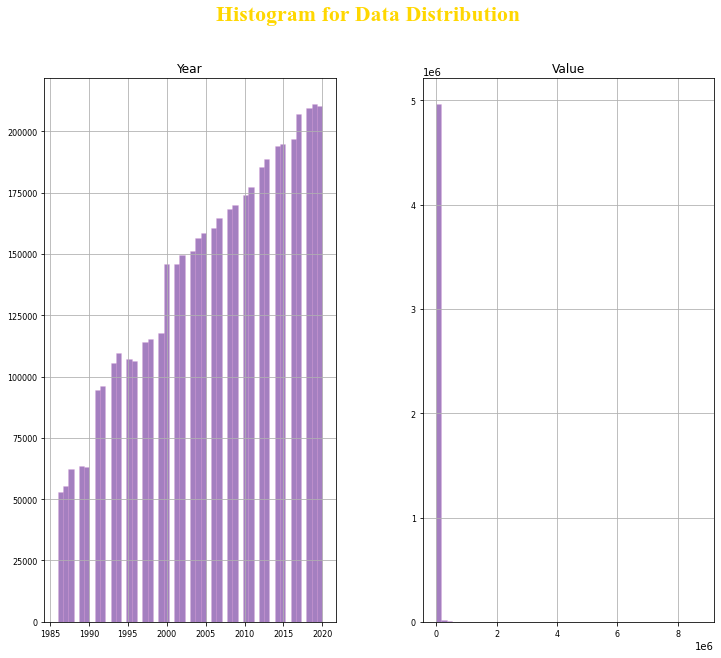

In [25]:
# DATA DISTRIBUTION

# BG COLOR - GLOBAL INNER
plt.rcParams.update({'axes.facecolor':'white'})#ghostwhite'})

df.hist(sharex=False, sharey=False,
        bins=50,
        xlabelsize=8, ylabelsize=8, 
        #grid=True,
        linewidth=0.5,
        color='indigo', 
        edgecolor='plum', alpha=0.5,        
        figsize=(12, 10)#cumulative=True
        )
#plt.grid(color='r', linestyle='-', linewidth=2)
plt.suptitle("Histogram for Data Distribution", color= "gold", fontsize=22,weight='bold',fontname="Times New Roman")

plt.show()

# BG COLOR - GLOBAL RESET
plt.rcdefaults()
#plt.rcParams["figure.figsize"] = [12, 10]

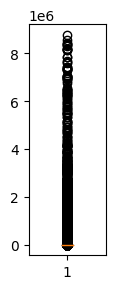

In [26]:
# BOXPLOT - IDENTIFY OUTLIERS
fig = plt.figure(figsize =(1, 3))
 
# Creating plot
#plt.boxplot(df.Value[df[(df.Value > 4000000.0)].index], showmeans=True, showcaps=True, showbox=True, showfliers=True)
plt.boxplot(df.Value) #showmeans=True, showcaps=True, showbox=True, showfliers=True)

# show plot
plt.show()

#### **`Anomalies`**
I found situations where countries have demonstrated `internal trade` with itself in the data. This is an unimaginable anomaly and for this have been removed.

In [27]:
df[df.Country == df.Partner]

Country Partner                                Item          Element  \
1880511  France  France  Lucerne (alfalfa) meal and pellets  Export Quantity   
1880514  France  France  Lucerne (alfalfa) meal and pellets     Export Value   
1880519  France  France                    Almonds, shelled  Export Quantity   
1880538  France  France                    Almonds, shelled     Export Value   
1880543  France  France                    Almonds, shelled     Export Value   
...         ...     ...                                 ...              ...   
1891536  France  France             Yoghurt, with additives     Export Value   
1891539  France  France             Yoghurt, with additives     Export Value   
1891543  France  France             Yoghurt, with additives     Export Value   
1891547  France  France             Yoghurt, with additives     Export Value   
1891551  France  France             Yoghurt, with additives     Export Value   

         Year   Value  
1880511  2005    23.0  
1880514  2005     4.0  
1880519  2000     3.0  
1880538  2000    14.0  
1880543  2003     3.0  
...       ...     ...  
1891536  2009  1783.0  
1891539  2010  2209.0  
1891543  2011  2462.0  
1891547  2012  2703.0  
1891551  2013  2042.0  

[2781 rows x 6 columns]

In [28]:
df = df[~(df.Country == df.Partner)]
df.reset_index(drop=True,inplace=True)

In [29]:
df[df.Country == df.Partner]

Empty DataFrame
Columns: [Country, Partner, Item, Element, Year, Value]
Index: []

#### Data Size & Dimensions: 
The data size of **4982468** entry meets the requirements of accurate model creation.

In [30]:
# Dimensions
print("Row:{} x Columns:{}".format(df.shape[0],df.shape[1]))

Row:4982468 x Columns:6


#### Data Overview
The `head` and `tail` functions show the first and last N observations in the data set which gives a glimpse at the structure of the data.

In [31]:
N = 4
display(df.head(N))
display(df.tail(N))

Country      Partner              Item          Element  Year  Value
0  Belgium  Afghanistan  Almonds, shelled  Import Quantity  2016    1.0
1  Belgium  Afghanistan  Almonds, shelled  Import Quantity  2017    1.0
2  Belgium  Afghanistan  Almonds, shelled  Import Quantity  2019   24.0
3  Belgium  Afghanistan  Almonds, shelled     Import Value  2016    4.0

Country   Partner  Item       Element  Year  Value
4982464  Netherlands  Zimbabwe  Wine  Export Value  1992    8.0
4982465  Netherlands  Zimbabwe  Wine  Export Value  1999    2.0
4982466  Netherlands  Zimbabwe  Wine  Export Value  2004    2.0
4982467  Netherlands  Zimbabwe  Wine  Export Value  2020   14.0

The `info` function depicts data about each variable in the data set as well as the dataset as a whole.
There are 6 columns and 4982468 rows. There are no more missing values in the entire data.

In [32]:
# verbose:full_summary   null_counts:show_NaN   memory_usage:Exact_Size  
df.info(verbose=True, null_counts=True,memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4982468 entries, 0 to 4982467
Data columns (total 6 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   Country  4982468 non-null  object 
 1   Partner  4982468 non-null  object 
 2   Item     4982468 non-null  object 
 3   Element  4982468 non-null  object 
 4   Year     4982468 non-null  int64  
 5   Value    4982468 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 1.4 GB


Below I will examine the statistical nature of the data more thoroughly, to organize, derive insight & possibly reduce the data in order to find patterns.

###  Exploratory Data Analysis (EDA)

**`Categorical Variable`**: <u>Trading Partner</u><br>
Based on the volume of Trading (Import & Export) the top 10 trading Partners of Ireland are the UK, Netherlands, France, Germany, Spain, Italy, USA, Belgium, Denmark and Poland. 

In [33]:
# TOP 10 TRADERS WITH IRELAND [using Researchpy]
rp.summary_cat(df[df.Country == 'Ireland'].Partner).head(10)
#df[df.Country == 'Ireland'].Partner.value_counts().head(10)

Variable                                            Outcome  Count  Percent
0  Partner  United Kingdom of Great Britain and Northern I...  38943    12.56
1                                                 Netherlands  21687     6.99
2                                                      France  19916     6.42
3                                                     Germany  17476     5.64
4                                                       Spain  12116     3.91
5                                                       Italy  11748     3.79
6                                    United States of America  11131     3.59
7                                                     Belgium   9233     2.98
8                                                     Denmark   7733     2.49
9                                                      Poland   6825     2.20

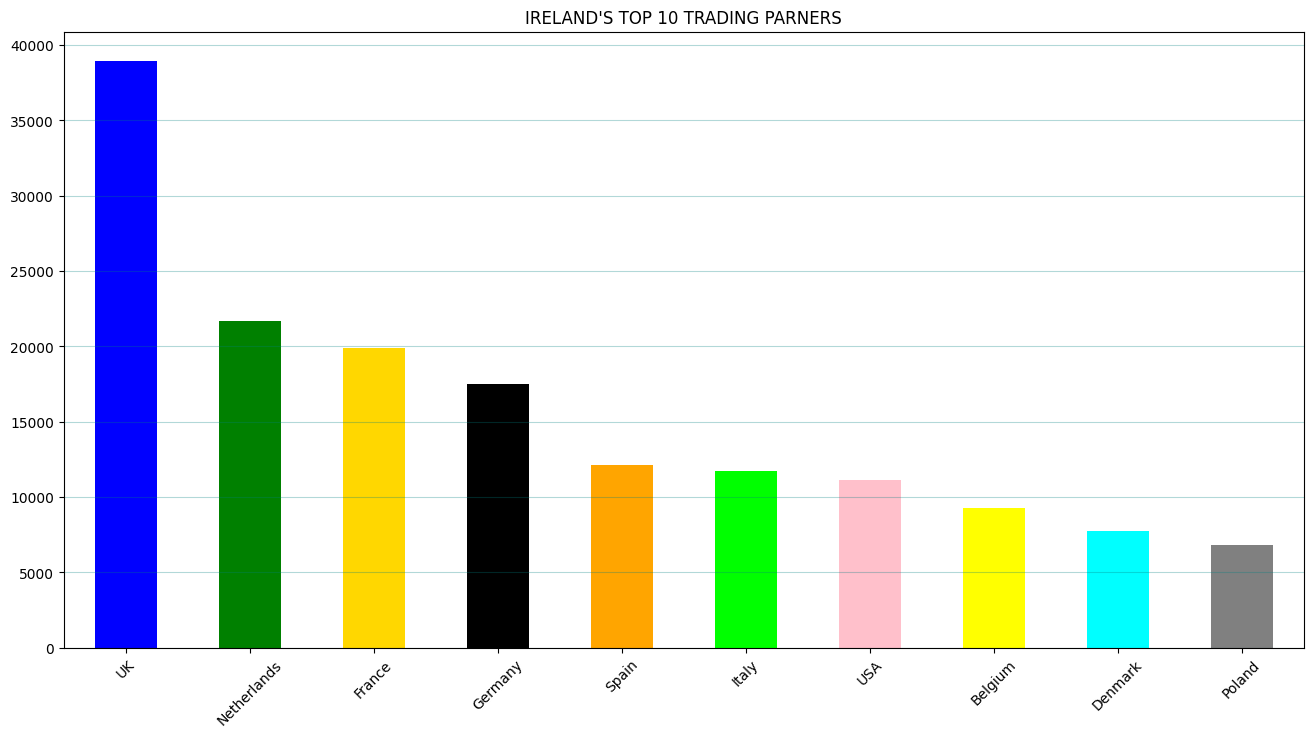

In [34]:
colors=['blue', 'green', 'gold','black','orange',
        'lime','pink','yellow','cyan','grey']
ax = df[df.Country == 'Ireland'].Partner.value_counts().head(10).plot.bar(rot=0, figsize=(16,8), width=0.5,
                                                                         color=colors)
ax.set_title('IRELAND\'S TOP 10 TRADING PARNERS')

ax.set_xticklabels(['UK','Netherlands','France','Germany',
                   'Spain','Italy','USA','Belgium','Denmark','Poland'])
plt.grid(axis='y', alpha=0.3, color='teal')
plt.xticks(rotation = 45)
plt.show()

## Statistics

### 1. Descriptive Statistics
With the help of Descriptive statistics I will summarize the data which is split into measures of central tendency (mean, median, and mode) and measures of variability (standard deviation, minimum/maximum values, range, kurtosis, and skewness). This will be used to analyse Ireland's Trade.

#### 1. Central tendency
In this section I will examine the central value of the data including but not limited to: mean, median and mode.
##### - Mean `[average value]`
Ireland's Trade is on average worth **2 700 190 USD**.

In [35]:
# Mean - average value of the data (compute the mean of float,fractional values)
round(st.mean(df[df.Country == 'Ireland'].Value),2) # rounded to 2 decimal places

2700.19

##### - Mode `[most frequent / repeated value]`
Ireland's Trade most frequent trade value is **1 000 USD**.

In [36]:
st.mode(df[df.Country == 'Ireland'].Value)

1.0

##### - Median `[center value of ordered data]`
With even length the average of the two center values is the output.<BR>
Ireland's Trade central value is **73 000 USD**.

In [37]:
#df[df.Country == 'Ireland'].Value.sort_values(ascending=True)
st.median(df[df.Country == 'Ireland'].Value)

73.0

In [38]:
#len(df)

##### - Harmonic Mean `[inverse of ordinary mean]`

In [39]:
st.harmonic_mean(df[df.Country == 'Ireland'].Value)

7.672725376440103

##### - Median Low - `[for even length data: lower value of the two center values (averaged for median)] `
Ireland's Trade lower central value is **73 000 USD**.

In [40]:
st.median_low(df[df.Country == 'Ireland'].Value)

73.0

##### - Median High - `[for even length data: higher value of the two center values (averaged for median)] `
Ireland's Trade higher central value is **73 000 USD**.

In [41]:
st.median_high(df[df.Country == 'Ireland'].Value)

73.0

#### 2. Variability Measurement

In [42]:
df[df.Country == 'Ireland'].Value.describe(include='all')

count    3.100520e+05
mean     2.700194e+03
std      1.681317e+04
min      1.000000e+00
25%      1.100000e+01
50%      7.300000e+01
75%      5.870000e+02
max      1.236733e+06
Name: Value, dtype: float64

#### 2. Dispersion
In this section we figure out how the data is spread about the center value and from each other. Variance, standard deviation come under this category.
##### - Variance `[Data Spread]`
This returns the value that represents how the values are spread from the mean. This is used when the data is a sample of the population.

In [43]:
st.variance(df[df.Country == 'Ireland'].Value)

282682741.7573349

##### - Standard Deviation `[]`
This function returns the standard deviation, square root of sample variance.

In [44]:
st.stdev(df[df.Country == 'Ireland'].Value)

16813.171674533478

##### - Population Variance: `[]`

In [45]:
st.pvariance(df[df.Country == 'Ireland'].Value)

282681830.03045756

##### - Population Standard Deviation: `[]`
Like the population variance, this returns the standard deviation of the whole population data.
Example of finding population standard deviation:

In [46]:
st.pstdev(df[df.Country == 'Ireland'].Value)

16813.144561040852

##### - Range `[Max-Min]`
There is a huge range between min and max value.

In [47]:
df[df.Country == 'Ireland'].Value.max()-df[df.Country == 'Ireland'].Value.min()

1236732.0

##### - Min-Max `[Max&Min]`
There is a huge range between min and max value.

In [48]:
print("Min: {}\nMax: {}".format(df[df.Country == 'Ireland'].Value.min(),
               df[df.Country == 'Ireland'].Value.max()))

Min: 1.0
Max: 1236733.0


##### - standard error (SE), 95% confidence interval: `[How Spread out Data is]`

I removed these Values as they have already been explored.
- N: non-missing count,
- Mean 
- SD: standard deviation

Whilst kept:
- SE: standard error (of the Mean)
- 95% confidence interval (for a mean)

Using Researcpy's summary_cont(), I measured:
- SE (standard error (of the Mean)) with which I gathered the spread of the dataset. Since it is large, the values are very spread out around the mean in the dataset.
- 95% confidence interval: the range of values that is likely to contain the mean of the population with 95% level of confidence is [2641.0131, 2759.3751]. This means there is a 95% chance that the confidence interval of [2641.0131, 2759.3751] contains the true population mean.

In [49]:
rp.summary_cont(df[df.Country == 'Ireland'].Value).drop(
    ['Variable','Mean','SD'],axis=1)

N       SE  95% Conf.   Interval
0  310052.0  30.1948  2641.0131  2759.3751

##### - Kurtosis: `[Tailedness Distribution]`
Since the kurtosis is such an excessively high positive value(>3), the data is 'heavy/fat-tailed' in technical terms 'Leptokurtic'.
This is an indication that there are a lot of outliers in the data.

Leptokurtic distributions have greater kurtotic than a normal distribution i.e. does not follow a normal distribution.

In [50]:
df[df.Country == 'Ireland'].Value.kurtosis()

650.7391473165231

##### - Skewness: `[Shape/Symmetry Distribution]`
Based on the skewness of the data, the distribution is asymmetrical being left-tailed (>0).

In [51]:
df[df.Country == 'Ireland'].Value.skew()

19.831157257992512

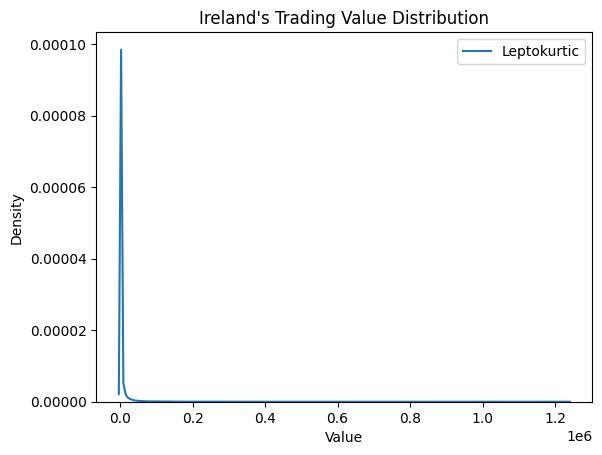

In [52]:
sns.kdeplot(df[df.Country == 'Ireland'].Value)
plt.title("Ireland's Trading Value Distribution")
plt.legend(["Leptokurtic"])

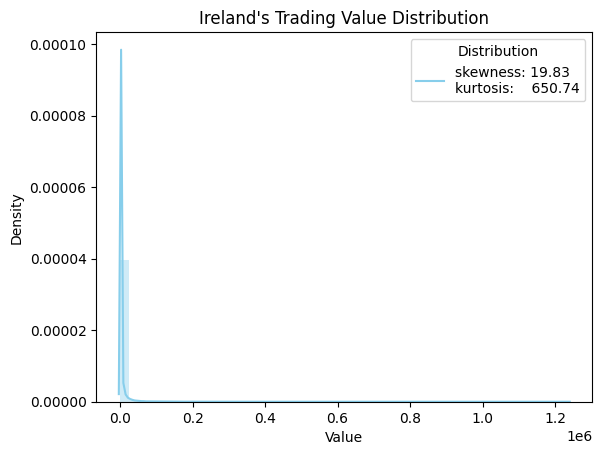

In [53]:
data = df[df.Country == 'Ireland'].Value

sns.distplot(data, color="skyblue")#olive,gold,teal
plt.title("Ireland's Trading Value Distribution")
plt.legend(['skewness: {}\nkurtosis:    {}'.format(round(data.skew(),2),round(data.kurt(),2))], title='Distribution')
plt.show()

### 2. Inferential statistics: 
In this section I will try to draw conclusion from the sample data.


In this method, we deal with data that can randomly vary, due to observational error, sampling difference, etc., and get details about it.

In [54]:
##!pip install statsmodels --upgrade
#!pip install scipy==1.2 --upgrade

In [55]:
df.Country.unique()

array(['Belgium', 'France', 'Germany', 'Ireland', 'Netherlands'],
      dtype=object)

In [56]:
df_IS_BE = df[(df.Country=="Belgium")&(df.Element=="Export Value") & (df.Item.str.contains("Potatoes"))]
df_IS_FR = df[(df.Country=="France")&(df.Element=="Export Value") & (df.Item.str.contains("Potatoes"))]
df_IS_GE = df[(df.Country=="Germany")&(df.Element=="Export Value") & (df.Item.str.contains("Potatoes"))]
df_IS_IE = df[(df.Country=="Ireland")&(df.Element=="Export Value") & (df.Item.str.contains("Potatoes"))]
df_IS_NE = df[(df.Country=="Netherlands")&(df.Element=="Export Value") & (df.Item.str.contains("Potatoes"))]

df_IS_BE = df_IS_BE.groupby(['Year']).Value.sum()#.reset_index(drop=False)#.set_index('')
df_IS_FR = df_IS_FR.groupby(['Year']).Value.sum()#.reset_index(drop=False)#.set_index()
df_IS_GE = df_IS_GE.groupby(['Year']).Value.sum()#.reset_index(drop=False)#.set_index()
df_IS_IE = df_IS_IE.groupby(['Year']).Value.sum()#.reset_index(drop=False)#.set_index()
df_IS_NE = df_IS_NE.groupby(['Year']).Value.sum()#.reset_index(drop=False)#.set_index()

In [57]:
production_potatoes = pd.concat([df_IS_BE,df_IS_FR,df_IS_GE,df_IS_IE,df_IS_NE],
                                  keys = ['BE','FR','GE','IE','NE'], 
                                  axis=1, join='outer')

In [58]:
production_potatoes = production_potatoes.sort_index(axis=0).reset_index(drop=False)#.sortby('Year')

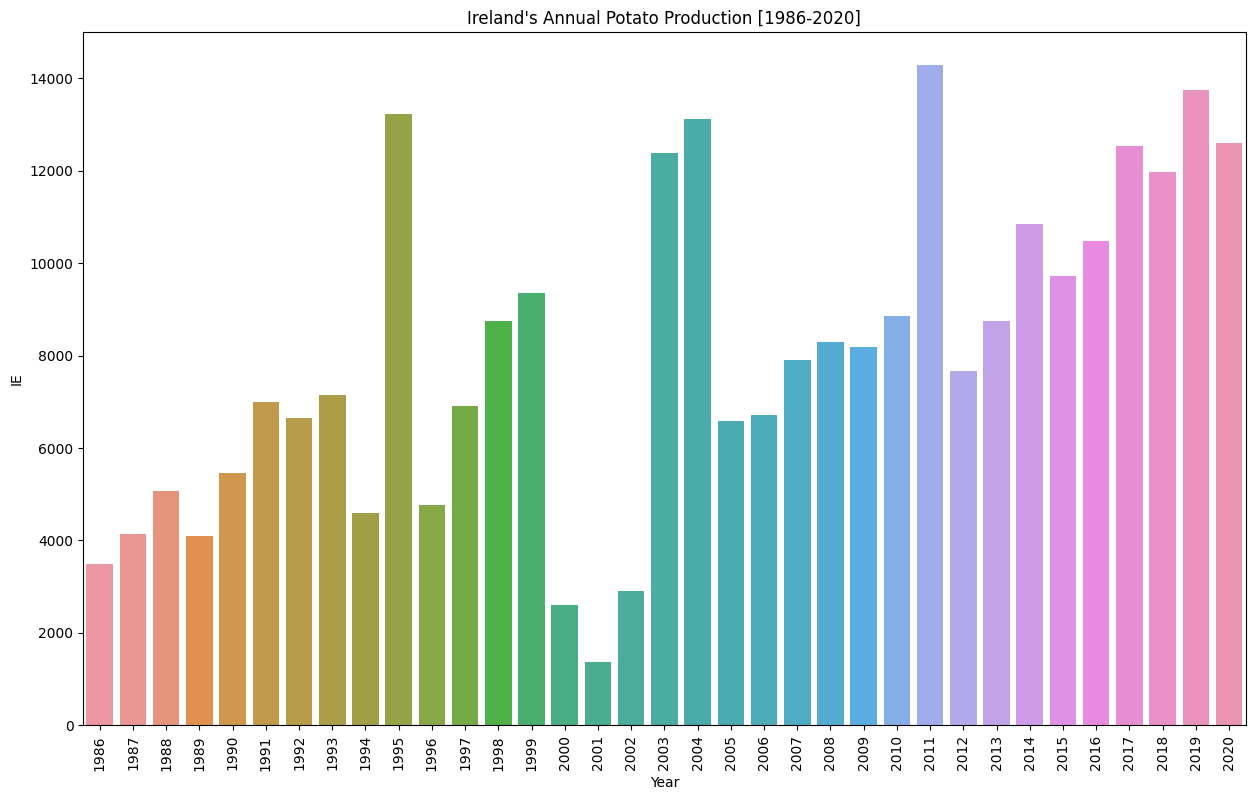

In [59]:
import seaborn as sns
ax = plt.subplots(figsize=(15,9))
ax = sns.barplot(x="Year", y="IE", data=production_potatoes)
plt.title("Ireland\'s Annual Potato Production [1986-2020]")
ax.set_xticklabels(labels=ax.get_xticklabels(),rotation=90);

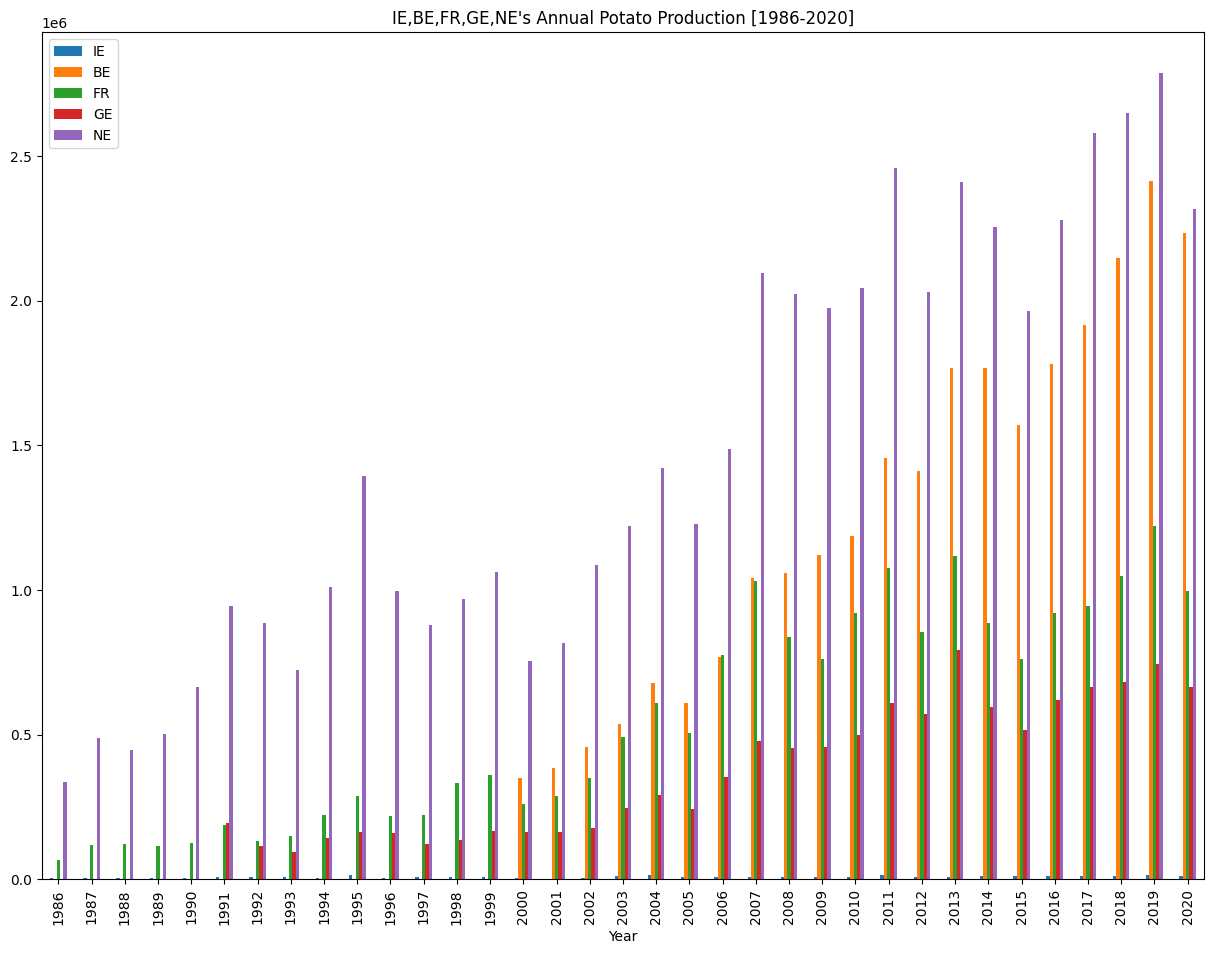

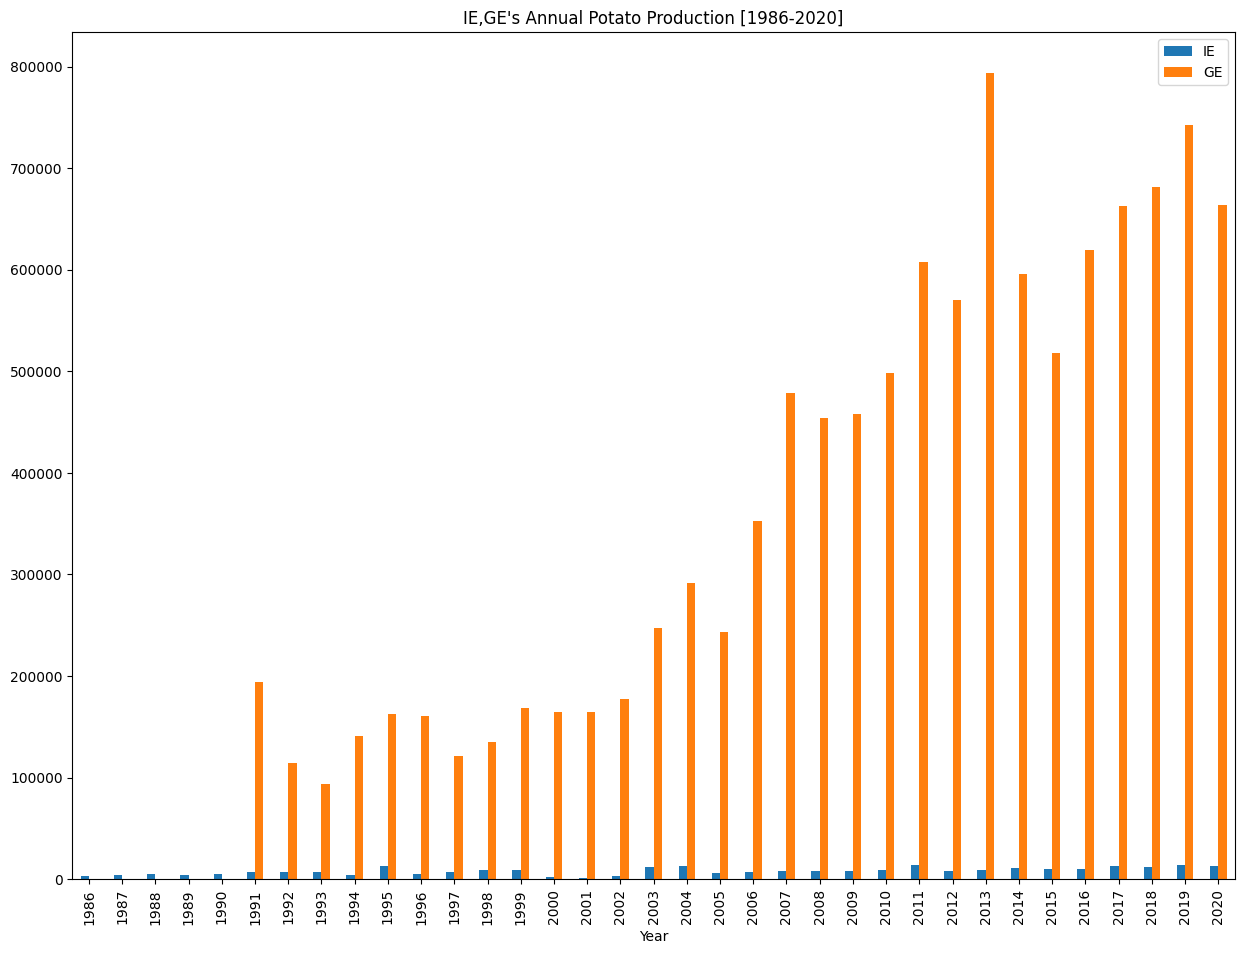

In [60]:
# ALL PRODUCTION
ax = production_potatoes.plot(x="Year", y=["IE","BE","FR","GE","NE"], 
                                     kind="bar",figsize=(15,11))

ax.set_xticklabels(labels=ax.get_xticklabels(),rotation=90)
ax.set_title("IE,BE,FR,GE,NE\'s Annual Potato Production [1986-2020]")


# IRELAND & GERMANY
ax = production_potatoes.plot(x="Year", y=["IE","GE"], 
                                     kind="bar",figsize=(15,11))
ax.set_xticklabels(labels=ax.get_xticklabels(),rotation=90)
ax.set_title("IE,GE\'s Annual Potato Production [1986-2020]")
plt.show()

## Poisson Distribution

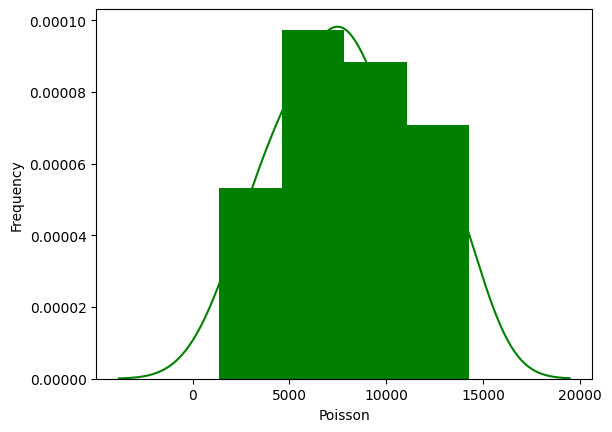

In [61]:
ax = sns.distplot(production_potatoes.IE, kde=True, color='green', hist_kws={"linewidth": 25,'alpha':1})
ax.set(xlabel='Poisson', ylabel='Frequency')
plt.show()

In [62]:
production_potatoes.IE.mean()

8064.114285714286

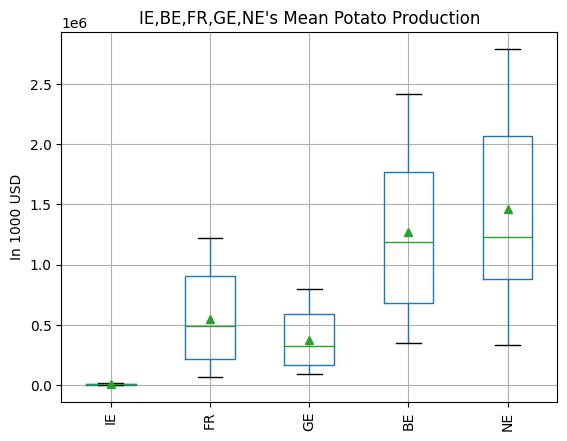

In [63]:
box = production_potatoes.boxplot(["IE", "FR","GE", "BE","NE"],
                      showmeans=True, whis=99)
plt.title("IE,BE,FR,GE,NE\'s Mean Potato Production")
plt.xticks(rotation=90)
plt.ylabel("In 1000 USD");

In [64]:
production_potatoes.IE.std()

3511.8544688076176

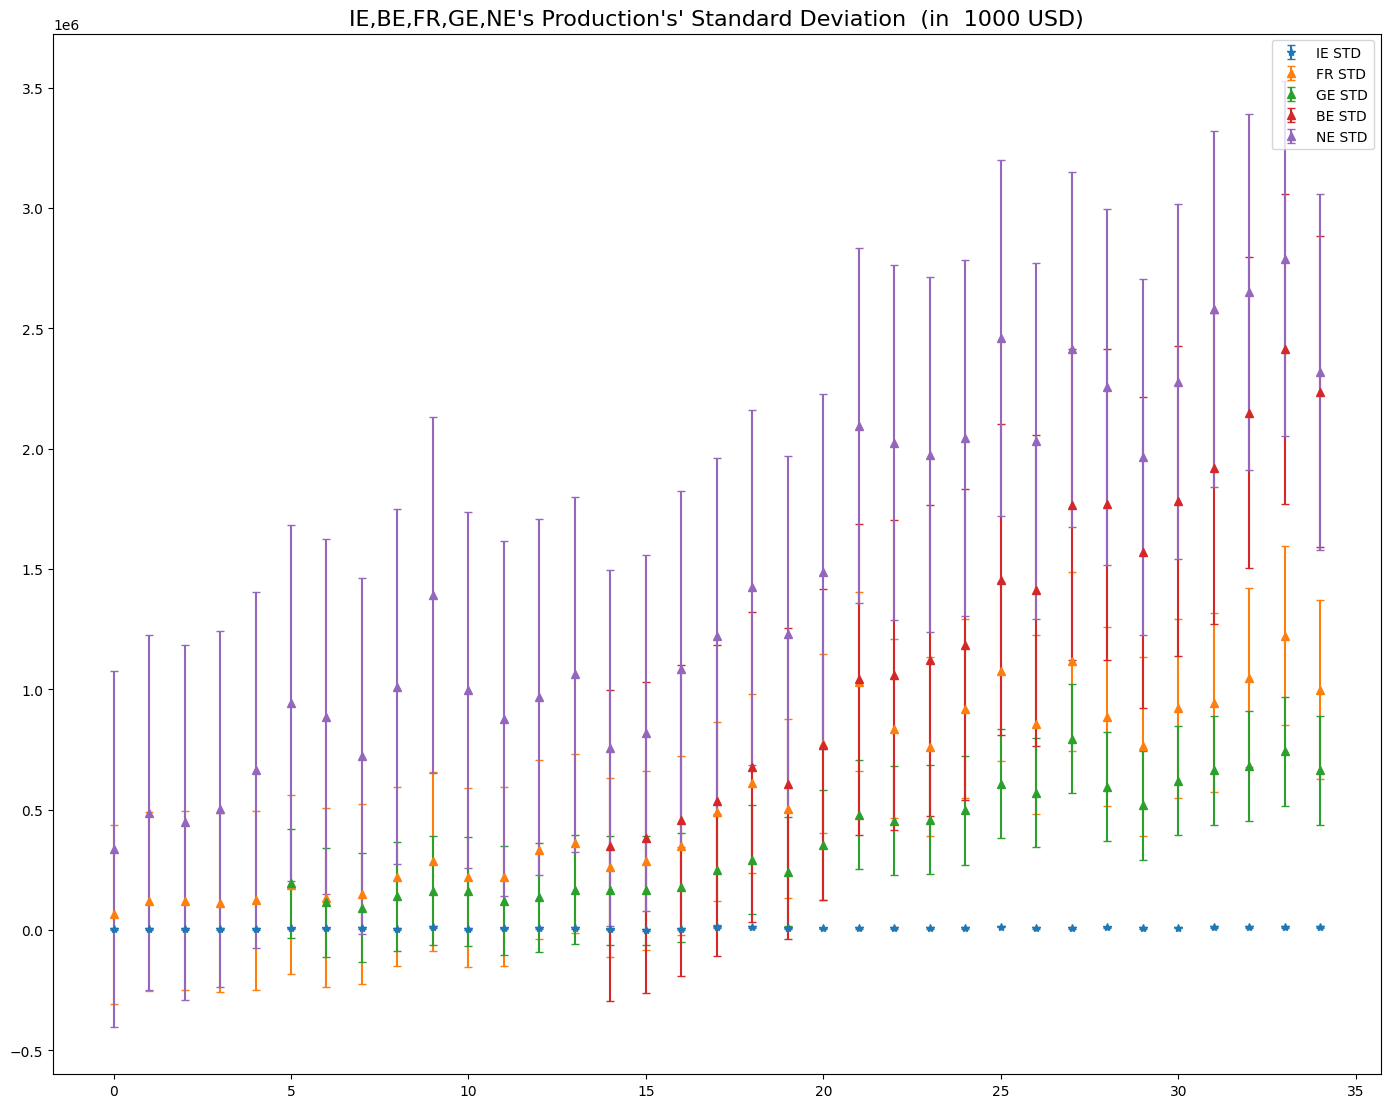

In [65]:
fig, ax = plt.subplots(figsize=(14,11))
fig.tight_layout()

ax = plt.title("IE,BE,FR,GE,NE\'s Production\'s' Standard Deviation  (in  1000 USD)",
               fontsize=16);
ax = plt.errorbar( production_potatoes.index, 
             production_potatoes.IE, 
             production_potatoes.IE.std(), 
             linestyle='None', marker='*', capsize=3, label="IE STD" )

ax = plt.errorbar( production_potatoes.index, 
             production_potatoes.FR, 
             production_potatoes.FR.std(), 
             linestyle='None', marker='^', capsize=3 , label="FR STD" )

ax = plt.errorbar( production_potatoes.index, 
             production_potatoes.GE, 
             production_potatoes.GE.std(), 
             linestyle='None', marker='^', capsize=3 , label="GE STD" )

ax = plt.errorbar( production_potatoes.index, 
             production_potatoes.BE, 
             production_potatoes.BE.std(), 
             linestyle='None', marker='^', capsize=3 , label="BE STD" )

ax = plt.errorbar( production_potatoes.index, 
             production_potatoes.NE, 
             production_potatoes.NE.std(), 
             linestyle='None', marker='^', capsize=3 , label="NE STD" )

plt.legend(loc ='upper right')

## Mean Dispersion

I analysed Ireland's potato production and discovered that its data has an exponential distribution.
Its standard deviation is larger than the mean this is because there are years with 'relatively' fewer production.
This results in the data being over-dispersed and discards the data from becoming a Poisson Distribution.

To convert it to Poisson Distribution, natural logarithms should be used on Ireland's production data. 

In [66]:
production_potatoes["ln(IE)"] = np.log(production_potatoes.IE)

[Text(0.5, 0, 'Poisson'), Text(0, 0.5, 'Frequency')]

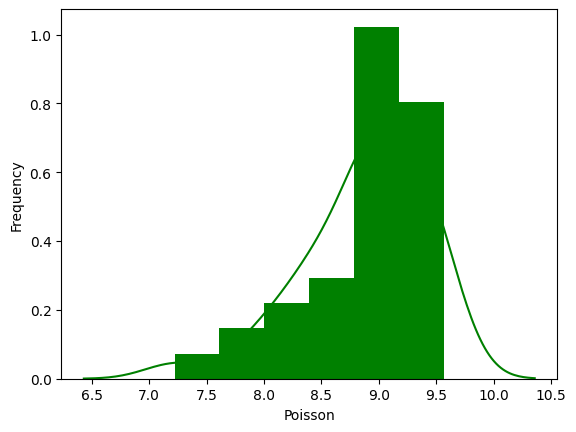

In [67]:
ax = sns.distplot(production_potatoes["ln(IE)"], kde=True, color='green', hist_kws={"linewidth": 5,'alpha':1})
ax.set(xlabel='Poisson', ylabel='Frequency')

In [68]:
#Formula: P(X=k) = λk*e**(–λ)/k!
from scipy.stats import poisson

mean_ln_production = production_potatoes["ln(IE)"].mean()
for index, row in production_potatoes.iterrows():
    print(row["ln(IE)"])
    print(poisson.pmf(k=int(row["ln(IE)"]), mu=mean_ln_production))

8.160232492367689
0.13346162907458534
8.330863613224745
0.13346162907458534
8.530109416682784
0.13346162907458534
8.316789127071518
0.13346162907458534
8.607033895416027
0.13346162907458534
8.85209276347713
0.13346162907458534
8.801920904041582
0.13346162907458534
8.873748128154395
0.13346162907458534
8.434028950155469
0.13346162907458534
9.490771217713771
0.13164480532777711
8.470520783217808
0.13346162907458534
8.840001065843392
0.13346162907458534
9.076351731972865
0.13164480532777711
9.144734614878189
0.13164480532777711
7.86172707782398
0.12026980152906537
7.220373836723949
0.12026980152906537
7.971085753505607
0.12026980152906537
9.423837546238587
0.13164480532777711
9.482274087459825
0.13164480532777711
8.793156870913819
0.13346162907458534
8.812248018197431
0.13346162907458534
8.975630184290507
0.13346162907458534
9.023167064451204
0.13164480532777711
9.009936307631463
0.13164480532777711
9.090091799380007
0.13164480532777711
9.567105311865157
0.13164480532777711
8.944158830970

[Text(0.5, 0, 'Poisson'), Text(0, 0.5, 'Frequency')]

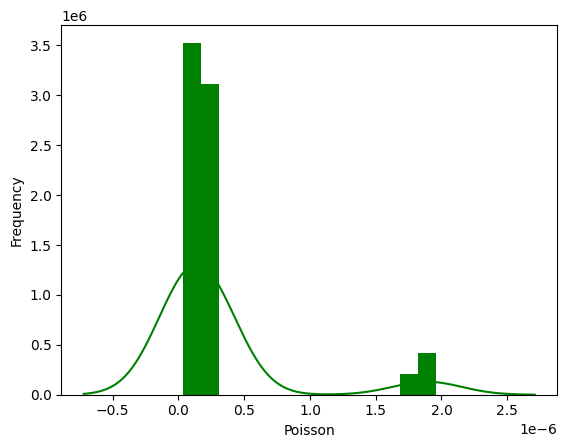

In [69]:
#Formula: P(X=k) = λk*e**(–λ)/k!
import math
from math import e

poisson_ln_production = []
mean_ln_production = production_potatoes["ln(IE)"].mean()
for index, row in production_potatoes.iterrows():
    poisson_ln_production.append(mean_ln_production*row["ln(IE)"]* 
                             (e**(-mean_ln_production))/  math.factorial(int(row["ln(IE)"])))
production_potatoes["poisson_ln(IE)"] = poisson_ln_production
ax = sns.distplot(production_potatoes["poisson_ln(IE)"], kde=True, color='green', hist_kws={"linewidth": 5,'alpha':1})
ax.set(xlabel='Poisson', ylabel='Frequency')

(array([-1.0e-06, -5.0e-07,  0.0e+00,  5.0e-07,  1.0e-06,  1.5e-06,
         2.0e-06,  2.5e-06,  3.0e-06]),
 [Text(-1e-06, 0, '−1.0'),
  Text(-5e-07, 0, '−0.5'),
  Text(0.0, 0, '0.0'),
  Text(5.000000000000001e-07, 0, '0.5'),
  Text(1e-06, 0, '1.0'),
  Text(1.4999999999999998e-06, 0, '1.5'),
  Text(2.0000000000000003e-06, 0, '2.0'),
  Text(2.4999999999999998e-06, 0, '2.5'),
  Text(3e-06, 0, '3.0')])

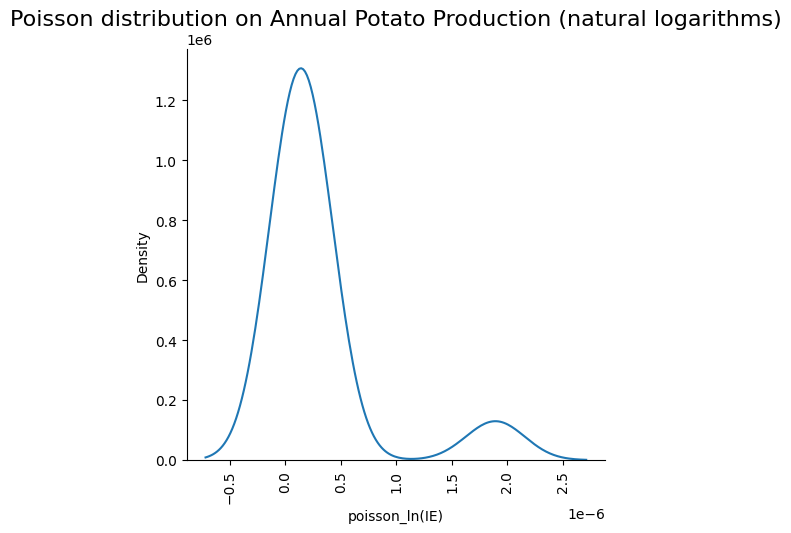

In [70]:
sns.displot( x="poisson_ln(IE)", kind="kde", data=production_potatoes)
plt.title('Poisson distribution on Annual Potato Production (natural logarithms)', fontsize=16) 
plt.xticks(rotation=90)

## Comparison of Ireland with other EU countries

Below, I undertook research to find similaries between countries against Ireland, and apply at least 5 parametric and non-parametric inferential statistics techniques to compare them (e.g., analysis of variance, t-test, wilcoxon test, among others).

For this task I used the Annual Potato Production of Ireland and four other similar countries.

In [71]:
from scipy.stats import ttest_ind
import scipy.stats as stats

IE = production_potatoes.IE.fillna(0).to_numpy()
BE = production_potatoes.BE.fillna(0).to_numpy()
NE = production_potatoes.NE.fillna(0).to_numpy()
FR = production_potatoes.FR.fillna(0).to_numpy()
GE = production_potatoes.GE.fillna(0).to_numpy()

print(" INFERENTIAL STATISTICS (Parametric & non-Parametric):::")

# STATISTICAL TEST: IE vs BE
print("\n______\tIE vs. BE _________________________")
print("> Mean: \t",np.mean(IE), np.mean(BE))
print("> Variance: \t",np.var(IE), np.var(BE))
print("> STD: \t\t",np.std(IE), np.std(BE))
print("> Welch Two-Sample T-Test:",ttest_ind(IE,BE,equal_var=False))
print("> Wilcoxon Test: \t\t",stats.wilcoxon(IE,BE, alternative='two-sided'))
print("> Mann Whitney Test:\t\t",stats.mannwhitneyu(IE, BE))
print("> Kolmogorov–Smirnov test\t",stats.ks_2samp(IE, BE))

# STATISTICAL TEST: IE vs NE
print("\n______\tIE vs. NE _________________________")
print("> Mean: \t",np.mean(IE), np.mean(NE))
print("> Variance: \t",np.var(IE), np.var(NE))
print("> STD: \t\t",np.std(IE), np.std(NE))
print("> Welch Two-Sample T-Test:",ttest_ind(IE,NE,equal_var=False))
print("> Wilcoxon Test: \t\t",stats.wilcoxon(IE,NE, alternative='two-sided'))
print("> Mann Whitney Test:\t\t",stats.mannwhitneyu(IE, NE))
print("> Kolmogorov–Smirnov test\t",stats.ks_2samp(IE, NE))

# STATISTICAL TEST: IE vs FR
print("\n______\tIE vs. FR _________________________")
print("> Mean: \t",np.mean(IE), np.mean(FR))
print("> Variance: \t",np.var(IE), np.var(FR))
print("> STD: \t\t",np.std(IE), np.std(FR))
print("> Welch Two-Sample T-Test:",ttest_ind(IE,FR,equal_var=False))
print("> Wilcoxon Test: \t\t",stats.wilcoxon(IE,FR, alternative='two-sided'))
print("> Mann Whitney Test:\t\t",stats.mannwhitneyu(IE, FR))
print("> Kolmogorov–Smirnov test\t",stats.ks_2samp(IE, FR))

# STATISTICAL TEST: IE vs GE
print("\n______\tIE vs. GE _________________________")
print("> Mean: \t",np.mean(IE), np.mean(GE))
print("> Variance: \t",np.var(IE), np.var(GE))
print("> STD: \t\t",np.std(IE), np.std(GE))
print("> Welch Two-Sample T-Test:",ttest_ind(IE,GE,equal_var=False))
print("> Wilcoxon Test: \t\t",stats.wilcoxon(IE,GE, alternative='two-sided'))
print("> Mann Whitney Test:\t\t",stats.mannwhitneyu(IE, GE))
print("> Kolmogorov–Smirnov test\t",stats.ks_2samp(IE, GE))

 INFERENTIAL STATISTICS (Parametric & non-Parametric):::

______	IE vs. BE _________________________
> Mean: 	 8064.114285714286 761822.1428571428
> Variance: 	 11980746.90122449 624923094641.4939
> STD: 		 3461.321554150162 790520.7743263259
> Welch Two-Sample T-Test: Ttest_indResult(statistic=-5.559733301884506, pvalue=3.2166496956024647e-06)
> Wilcoxon Test: 		 WilcoxonResult(statistic=105.0, pvalue=0.0005825314188358219)
> Mann Whitney Test:		 MannwhitneyuResult(statistic=490.0, pvalue=0.15021809656978471)
> Kolmogorov–Smirnov test	 KstestResult(statistic=0.6, pvalue=3.4452298564531986e-06)

______	IE vs. NE _________________________
> Mean: 	 8064.114285714286 1463037.6
> Variance: 	 11980746.90122449 529799898467.3828
> STD: 		 3461.321554150162 727873.5456570617
> Welch Two-Sample T-Test: Ttest_indResult(statistic=-11.655574693806388, pvalue=2.0053150413418454e-13)
> Wilcoxon Test: 		 WilcoxonResult(statistic=0.0, pvalue=2.4770276393652366e-07)
> Mann Whitney Test:		 Mannwhitney

Above, I examined the production's Mean, Variance, STD of four countries compared to Ireland. All these results can be seen above.

Notably, Since the Variance of all the Compared Countries are different the Welch's T-Test is done, to see whether there is a large contrast in the mean Production or they are the same between Ireland and the compared countries. It shows that the p-value is smaller than 0.05 in practically all the test cases (Wilcoxon, Mann Whitney...). With these results, I cannot derive the test is significant.

In [72]:
pd.set_option('display.float_format', '{:.2f}'.format)

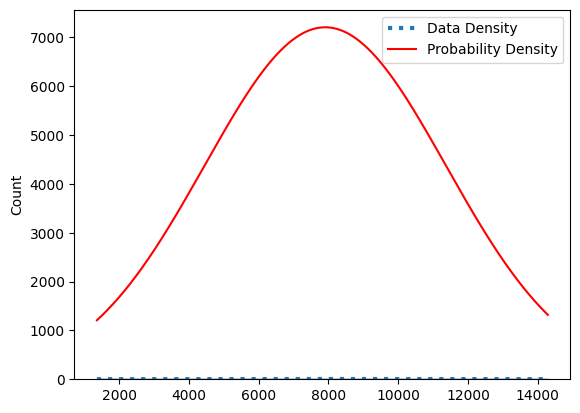

In [73]:
import scipy.stats
column_data = production_potatoes['IE'].fillna(0).to_numpy()
#column_data = production_potatoes['ln(IE)'].fillna(0).to_numpy()
#column_data = production_potatoes['poisson_ln(IE)'].fillna(0).to_numpy()

ax = sns.histplot( data=column_data, kde=True, line_kws={'linestyle':':','linewidth':3} )

median = np.median(column_data)#column_data.median()
x = np.arange( column_data.min(), column_data.max(), 0.1 )
y = stats.norm.pdf( x, scale=column_data.std(), loc=median )
y = [ p*median**2 for p in y ] #scaling
ax.plot( x, y, c='r' )
plt.legend( labels=["Data Density","Probability Density"] );

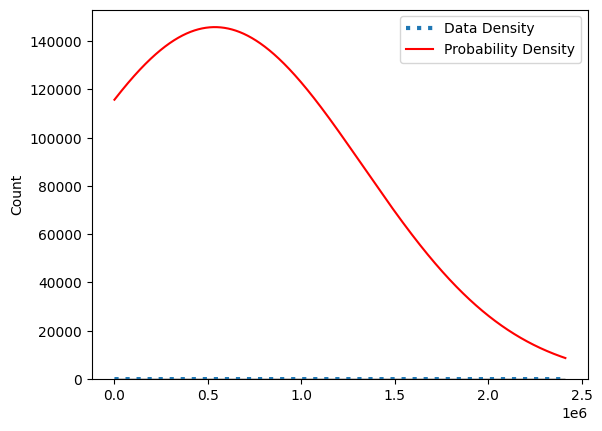

In [74]:
import scipy.stats
column_data = production_potatoes['BE'].fillna(0).to_numpy()

ax = sns.histplot( data=column_data, kde=True, line_kws={'linestyle':':','linewidth':3} )

median = np.median(column_data)#column_data.median()
x = np.arange( column_data.min(), column_data.max(), 0.1 )
y = stats.norm.pdf( x, scale=column_data.std(), loc=median )
y = [ p*median**2 for p in y ] #scaling
ax.plot( x, y, c='r' )
plt.legend( labels=["Data Density","Probability Density"] );

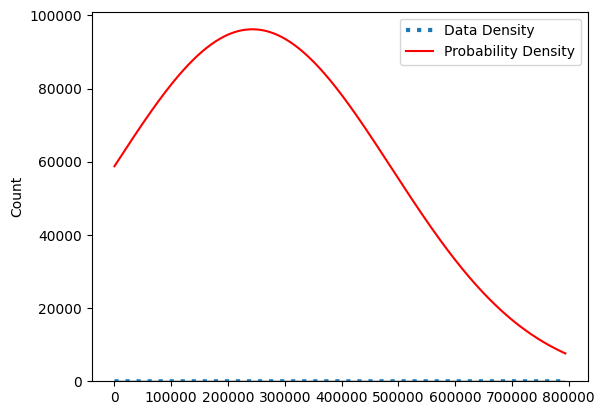

In [75]:
import scipy.stats
column_data = production_potatoes['GE'].fillna(0).to_numpy()

ax = sns.histplot( data=column_data, kde=True, line_kws={'linestyle':':','linewidth':3} )

median = np.median(column_data)#column_data.median()
x = np.arange( column_data.min(), column_data.max(), 0.1 )
y = stats.norm.pdf( x, scale=column_data.std(), loc=median )
y = [ p*median**2 for p in y ] #scaling
ax.plot( x, y, c='r' )
plt.legend( labels=["Data Density","Probability Density"] );

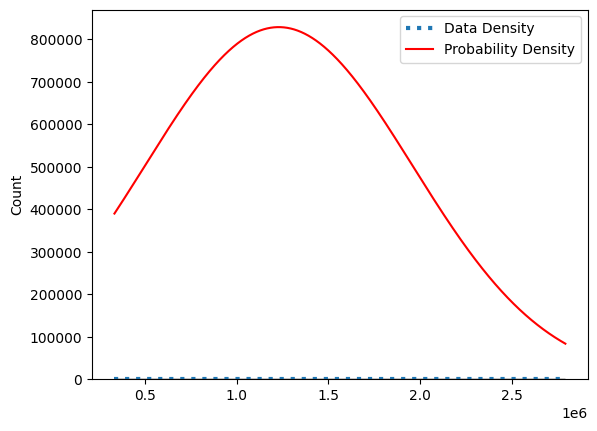

In [76]:
import scipy.stats
column_data = production_potatoes['NE'].fillna(0).to_numpy()

ax = sns.histplot( data=column_data, kde=True, line_kws={'linestyle':':','linewidth':3} )

median = np.median(column_data)#column_data.median()
x = np.arange( column_data.min(), column_data.max(), 0.1 )
y = stats.norm.pdf( x, scale=column_data.std(), loc=median )
y = [ p*median**2 for p in y ] #scaling
ax.plot( x, y, c='r' )
plt.legend( labels=["Data Density","Probability Density"] );

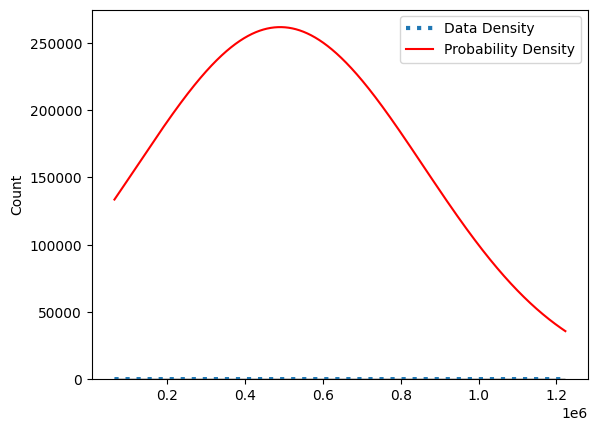

In [77]:
import scipy.stats
column_data = production_potatoes['FR'].fillna(0).to_numpy()

ax = sns.histplot( data=column_data, kde=True, line_kws={'linestyle':':','linewidth':3} )

median = np.median(column_data)#column_data.median()
x = np.arange( column_data.min(), column_data.max(), 0.1 )
y = stats.norm.pdf( x, scale=column_data.std(), loc=median )
y = [ p*median**2 for p in y ] #scaling
ax.plot( x, y, c='r' )
plt.legend( labels=["Data Density","Probability Density"] );

This concludes the Inferential statistics on Potato Production comparing Ireland to other countries.

# Data Preparation

## Feature Engineering - Selection

In [78]:
#df[df.Partner == 'Türkiye'] latin5

In [134]:
df_iso

Countries                  Countries_v2  UN Code Alpha-2  \
0                 Afghanistan                   Afghanistan        4      AF   
1               Åland Islands                 Åland Islands      248      AX   
2                     Albania                       Albania        8      AL   
3                     Algeria                       Algeria       12      DZ   
4              American Samoa                American Samoa       16      AS   
..                        ...                           ...      ...     ...   
255  United States of America                 Midway Island      840      US   
256  United States of America               Johnston Island      840      US   
257  United States of America  Canton and Enderbury Islands      840      US   
258  United States of America                   Wake Island      840      US   
259                    Serbia                  Yugoslav SFR      688      RS   

    Alpha-3  
0       AFG  
1       ALA  
2       ALB  
3       DZA  
4       ASM  
..      ...  
255     USA  
256     USA  
257     USA  
258     USA  
259     SRB  

[260 rows x 5 columns]

In [79]:
# TAKES A COUPLE SECONDS!
tmp = dict(zip(df_iso.Countries_v2.tolist(), df_iso['Alpha-3']))
df['Alpha3'] = df.apply(lambda row: tmp[row["Partner"]], axis=1)

In [80]:
# STORE Cleaned Data
df.to_csv('./Data/_TradeClean.csv',encoding = "utf-16",index = False)

# LOAD Cleaned Data
#import pandas as pd
#df = pd.read_csv("./Data/_TradeClean.csv")#,sep='\t')

In [81]:
df

Country      Partner              Item          Element  Year  \
0            Belgium  Afghanistan  Almonds, shelled  Import Quantity  2016   
1            Belgium  Afghanistan  Almonds, shelled  Import Quantity  2017   
2            Belgium  Afghanistan  Almonds, shelled  Import Quantity  2019   
3            Belgium  Afghanistan  Almonds, shelled     Import Value  2016   
4            Belgium  Afghanistan  Almonds, shelled     Import Value  2017   
...              ...          ...               ...              ...   ...   
4982463  Netherlands     Zimbabwe              Wine     Export Value  1988   
4982464  Netherlands     Zimbabwe              Wine     Export Value  1992   
4982465  Netherlands     Zimbabwe              Wine     Export Value  1999   
4982466  Netherlands     Zimbabwe              Wine     Export Value  2004   
4982467  Netherlands     Zimbabwe              Wine     Export Value  2020   

         Value Alpha3  
0         1.00    AFG  
1         1.00    AFG  
2        24.00    AFG  
3         4.00    AFG  
4         4.00    AFG  
...        ...    ...  
4982463   1.00    ZWE  
4982464   8.00    ZWE  
4982465   2.00    ZWE  
4982466   2.00    ZWE  
4982467  14.00    ZWE  

[4982468 rows x 7 columns]

In [82]:
#list(df[(df.Unit=='1000 US$')&(df["Element"].str.contains("(Export Value)|(Import Value)"))].Item.unique())

# Ireland Trade (Import-Export)

In [83]:
# Ireland's Trading Data (Import & Export)
df_IE = df[df["Country"]=="Ireland"]
df_IE.drop(["Country"], axis='columns', inplace = True)
df_IE.reset_index(drop=True, inplace=True)
df_IE.tail()

Partner               Item          Element  Year  Value Alpha3
310047  Zimbabwe  Vegetables frozen  Import Quantity  1994   1.00    ZWE
310048  Zimbabwe  Vegetables frozen     Import Value  1997   1.00    ZWE
310049  Zimbabwe               Wine  Import Quantity  2000   1.00    ZWE
310050  Zimbabwe               Wine     Import Value  1988   4.00    ZWE
310051  Zimbabwe               Wine     Import Value  2000   2.00    ZWE

## `Ireland's Global Import`
Below is the global import trading trend of Ireland over the years.

In [84]:
# Ireland's Import Data (Each Product)
df_IE_I = df[(df["Country"]=="Ireland") & (df.Element == "Import Value")]
df_IE_I.drop(['Element'], axis=1, inplace = True)

# Ireland's Import (Annual_Sum/Countries)
df_IE_I_V = df_IE_I.groupby(["Year","Alpha3","Partner"]).sum()
df_IE_I_V.reset_index(drop=False, inplace=True)

In [85]:
#px.choropleth??

In [86]:
# https://plotly.com/python/reference/layout/
# https://plotly.com/python/builtin-colorscales/

import plotly.express as px

map_shape = ['equirectangular', 'mercator', 'orthographic', 'natural earth',
             'kavrayskiy7', 'miller', 'robinson', 'eckert4', 'azimuthal equal area', 
             'azimuthal equidistant', 'conic equal area', 'conic conformal',
             'conic equidistant', 'gnomonic', 'stereographic', 'mollweide', 'hammer',
             'transverse mercator', 'albers usa', 'winkel tripel', 'aitoff', 'sinusoidal']

map_region = ['world','usa','europe','asia','africa','north america','south america','albers usa'] # default:world

fig_IE_I_V = px.choropleth( data_frame=df_IE_I_V,
                            locations="Alpha3",
                            locationmode="ISO-3",
                            geojson=dict(projection={"type":map_shape[0]},showframe=True, showcoastlines=True),
                            #featureidkey="properties.district",
                           
                            # Color Options
                            color="Value",
                            color_continuous_scale=px.colors.sequential.Oryel,
                           
                            # hover info
                            hover_name="Partner",
 
                            # Data Range
                            range_color = [0,df_IE_I_V.Value.max()*0.1],
                           
                            animation_frame="Year",
                            animation_group="Year",
                           
                            basemap_visible=True,
                           
                            projection = map_shape[0],
                            scope='world',#'europe',#'world',#'usa',
                            width=804, height=550)

fig_IE_I_V.update_layout(title_font_color="red", title_font_family='Times New Roman',title_font_size=24,
                         title_text='Ireland\'s Global Import Value' + '<br>' +'[1000 USD per Year]',
                         #title_x=0.1,title_y=0.9
                        )
fig_IE_I_V.show()

## `Ireland's Global Export`
Below is the global export trading trend of Ireland over the years.

In [87]:
# Ireland's Export Data (Each Product)
df_IE_E = df[(df["Country"]=="Ireland") & (df.Element == "Export Value")]
df_IE_E.drop(['Element'], axis=1, inplace = True)

# Ireland's Export (Annual_Sum/Countries)
df_IE_E_V = df_IE_E.groupby(["Year","Alpha3","Partner"]).sum()
df_IE_E_V.reset_index(drop=False, inplace=True)

In [88]:
# https://plotly.com/python/reference/layout/
# https://plotly.com/python/builtin-colorscales/

import plotly.express as px

map_shape = ['equirectangular', 'mercator', 'orthographic', 'natural earth',
             'kavrayskiy7', 'miller', 'robinson', 'eckert4', 'azimuthal equal area', 
             'azimuthal equidistant', 'conic equal area', 'conic conformal',
             'conic equidistant', 'gnomonic', 'stereographic', 'mollweide', 'hammer',
             'transverse mercator', 'albers usa', 'winkel tripel', 'aitoff', 'sinusoidal']

map_region = ['world','usa','europe','asia','africa','north america','south america','albers usa'] # default:world

fig_IE_E_V = px.choropleth( data_frame=df_IE_E_V,
                            locations="Alpha3",
                            locationmode="ISO-3",
                            geojson=dict(projection={"type":map_shape[0]},showframe=True, showcoastlines=True),
                            #featureidkey="properties.district",
                           
                            # Color Options
                            color="Value",
                            color_continuous_scale=px.colors.sequential.Blugrn,
                           
                            # hover info
                            hover_name="Partner",
 
                            # Data Range
                            range_color = [0,df_IE_E_V.Value.max()*0.1],
                           
                            animation_frame="Year",
                            animation_group="Year",
                           
                            basemap_visible=True,
                           
                            projection = map_shape[0],
                            scope='world',#'europe',#'world',#'usa',
                            width=804, height=550)

fig_IE_E_V.update_layout(title_font_color="green", title_font_family='Times New Roman',title_font_size=24,
                         title_text='Ireland\'s Global Export Value' + '<br>' +'[1000 USD per Year]',
                         #title_x=0.1,title_y=0.9
                        )
fig_IE_E_V.show()

## `Ireland's Global Trade Balance`

In [89]:
# Value [+:Export,-:Import]
df_IE_B = df_IE.copy()
for index, row in df_IE_B.iterrows():  # 2-5 minutes !!!
    if (row.Element == "Import Value"):
        df_IE_B.loc[index, "Value"]*=(-1)
df_IE_B.drop(['Element'],axis=1,inplace = True)

# Ireland's Trade Balance (Annual_Sum/Countries)
df_IE_B_V = df_IE_B.groupby(["Year","Alpha3", "Partner"]).sum()
df_IE_B_V.reset_index(drop=False, inplace=True)

In [90]:
# https://plotly.com/python/reference/layout/
# https://plotly.com/python/builtin-colorscales/

import plotly.express as px

map_shape = ['equirectangular', 'mercator', 'orthographic', 'natural earth',
             'kavrayskiy7', 'miller', 'robinson', 'eckert4', 'azimuthal equal area', 
             'azimuthal equidistant', 'conic equal area', 'conic conformal',
             'conic equidistant', 'gnomonic', 'stereographic', 'mollweide', 'hammer',
             'transverse mercator', 'albers usa', 'winkel tripel', 'aitoff', 'sinusoidal']

map_region = ['world','usa','europe','asia','africa','north america','south america','albers usa'] # default:world

fig_IE_B_V = px.choropleth( data_frame=df_IE_B_V,
                            locations="Alpha3",
                            locationmode="ISO-3",
                            geojson=dict(projection={"type":map_shape[0]},showframe=True, showcoastlines=True),
                            #featureidkey="properties.district",
                           
                            # Color Options
                            color="Value",
                            color_continuous_scale=px.colors.sequential.Sunset,
                           
                            # hover info
                            hover_name="Partner",
 
                            # Data Range
                            range_color = [0,df_IE_B_V.Value.max()*0.1],
                           
                            animation_frame="Year",
                            animation_group="Year",
                           
                            basemap_visible=True,
                           
                            projection = map_shape[0],
                            scope='world',#'europe',#'world',#'usa',
                            width=804, height=550)

fig_IE_B_V.update_layout(title_font_color="purple", title_font_family='Times New Roman',title_font_size=24,
                         title_text='Ireland\'s Global Trade Balance' + '<br>' +'[1000 USD per Year]',
                         #title_x=0.1,title_y=0.9
                        )
fig_IE_B_V.show()

<div class="alert alert-block alert-info"> <b>NOTE:</b> Please see <u>Dashboard</u> containing Ireland's Global Trade at the end of this notebook. It was allocated as such since it runs non-stop in the background, not allowing the next codes to run. Thank you!</div>

In [91]:
df_IE_B_V.describe()

Year      Value
count 5715.00    5715.00
mean  2003.22   80850.08
std     10.05  467991.14
min   1986.00  -33706.00
25%   1995.00     417.00
50%   2003.00    4383.00
75%   2012.00   25351.50
max   2020.00 8881451.00

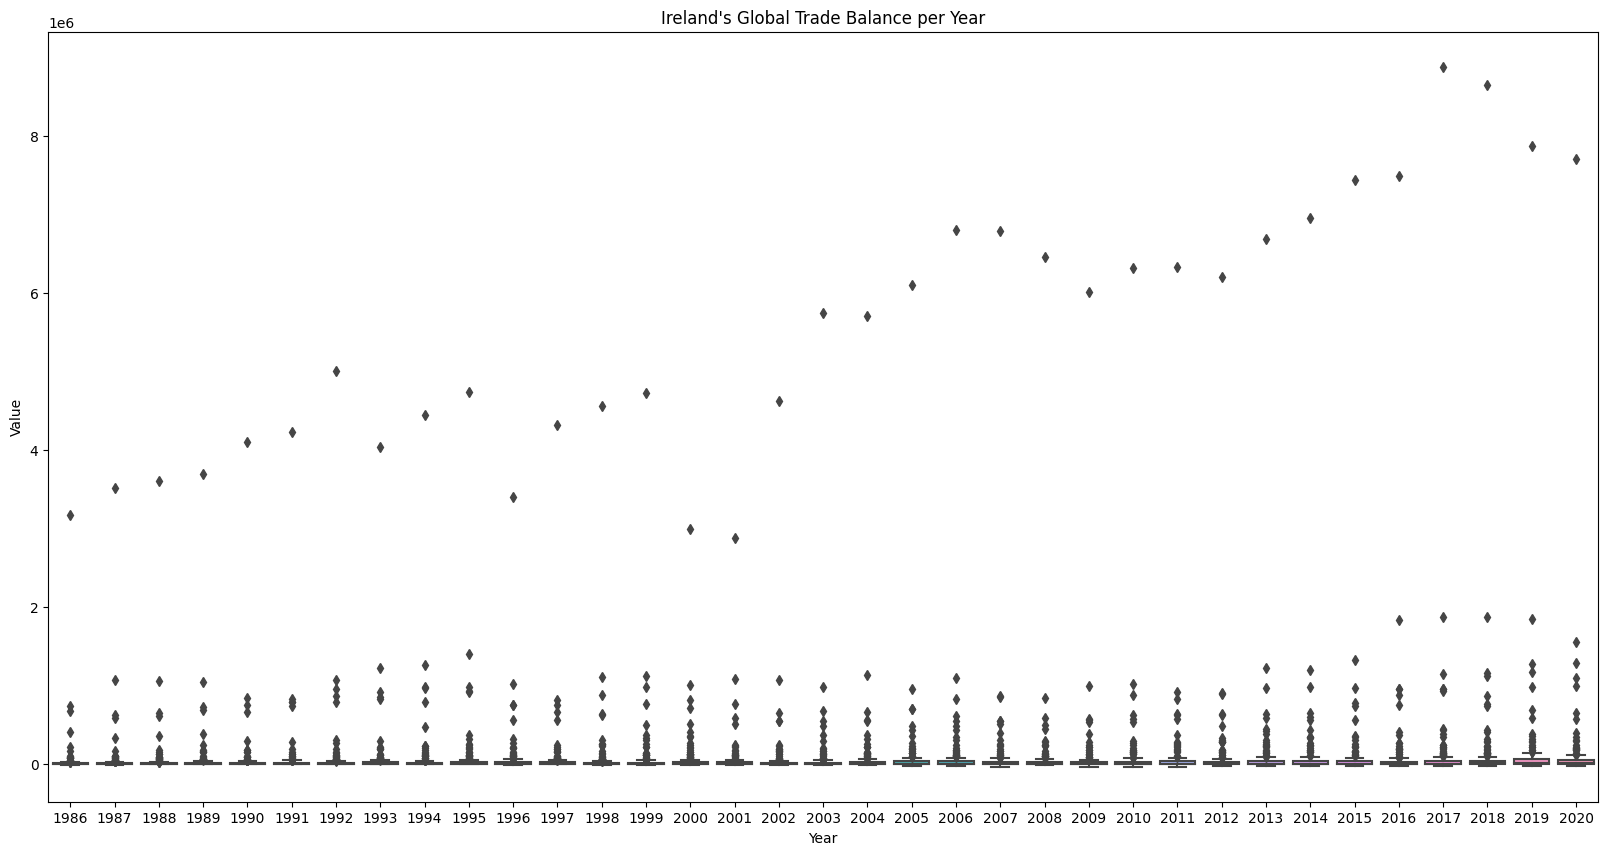

In [92]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=df_IE_B_V, x='Year', y='Value')
ax.set_title('Ireland\'s Global Trade Balance per Year')
plt.show()

## **4. Modelling:**

### **Analysis & Prediction of Time Series:**
I continued my analysis with comparing the trading data (more specifically **export**) of **Ireland** and **France**. France being one of the biggest traders with Ireland. For this I created **ARIMA** model as an optimal prediction choice for this time series data.

In [93]:
df.Country.unique()

array(['Belgium', 'France', 'Germany', 'Ireland', 'Netherlands'],
      dtype=object)

#### **`Ireland & France:`** `Historical & Autocorrection Values`
I plotted Ireland and Frances's past export data and then did an autocorrelation calculation to measure the likeness of present record to past ones. This includes finding possible trend and seeing if the past values have any impact on present records.

In [94]:
df_IE_model = df[(df.Country=="Ireland")&(df.Element=="Export Value")].groupby("Year").sum().sort_values(["Year"],ascending=True)
#df_IE_model.reset_index(drop=False,inplace=True)
#df_IE_model.set_index('Year')

In [95]:
df_FR_model = df[(df.Country=="France")&(df.Element=="Export Value")].groupby("Year").sum().sort_values(["Year"],ascending=True)
#df_FR_model.reset_index(drop=True,inplace=True)

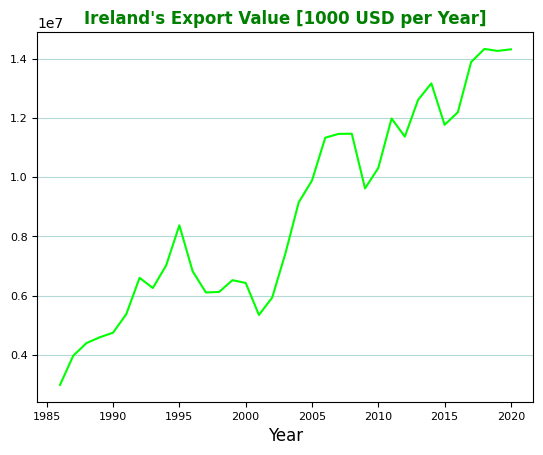

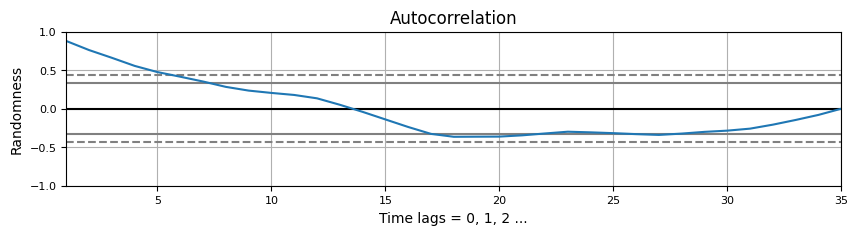

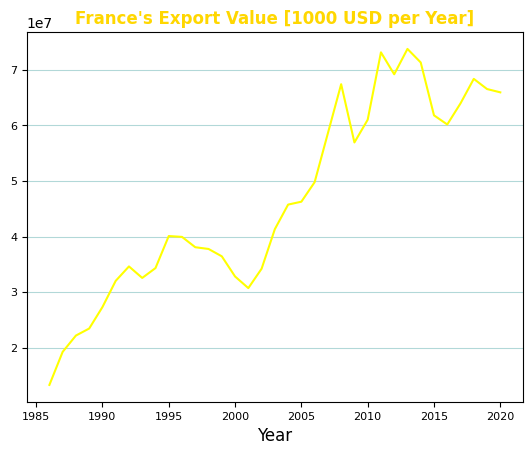

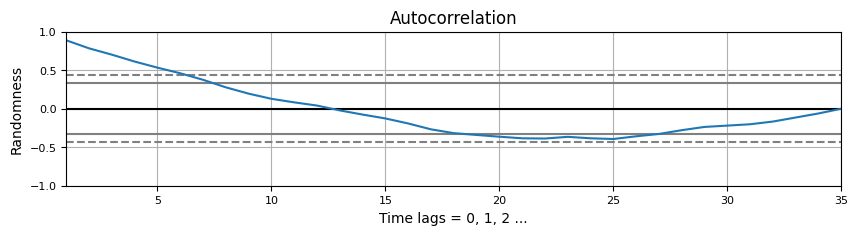

In [96]:
from pandas.plotting import autocorrelation_plot

# IRELAND
# Historical Values

fig.figsize=(60,120)
fig.dpi=240
fig.tight_layout(pad=6.0)


df_IE_model.plot(#figsize=(8,1),
                 color=["lime"],fontsize=8,legend=False)


plt.title("Ireland\'s Export Value [1000 USD per Year]",color='green',fontweight='bold',fontsize= 12)
plt.xlabel("Year", fontsize = 12)
plt.grid(axis='y', alpha=0.3, color='teal')
fig = plt.figure(figsize = (10,2))

# Autocorrelation
autocorrelation_plot(df_IE_model)
plt.title("Autocorrelation")#,color='green',fontweight='bold',fontsize= 12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.xlabel("Time lags = 0, 1, 2 ...", fontsize=10)
plt.ylabel("Randomness", fontsize=10)

plt.show()

# FRANCE
# Historical Values
df_FR_model.plot(#figsize=(8,1),
                 color=["yellow"],fontsize=8,legend=False)
plt.title("France\'s Export Value [1000 USD per Year]",color='gold',fontweight='bold', fontsize= 12)
plt.xlabel("Year", fontsize = 12)
plt.grid(axis='y', alpha=0.3, color='teal')
fig = plt.figure(figsize = (10,2))

# Autocorrelation
autocorrelation_plot(df_FR_model)
plt.title("Autocorrelation")
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.xlabel("Time lags = 0, 1, 2 ...", fontsize=10)
plt.ylabel("Randomness", fontsize=10)

plt.show()

In [97]:
#plt.rcParams.update({'figure.figsize':(10,3), 'figure.dpi':120})

#### **`Ireland & France:`** `ACF ( Autocorrection Function)`

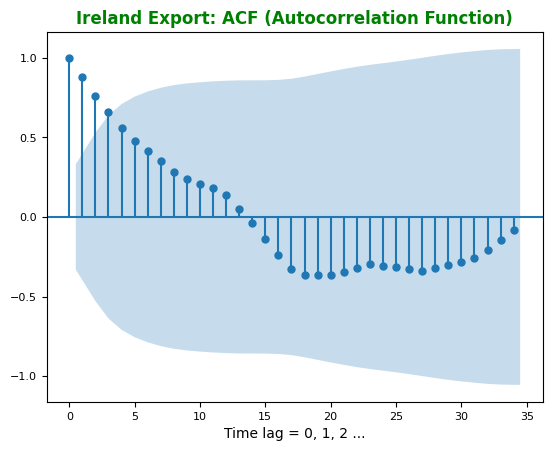

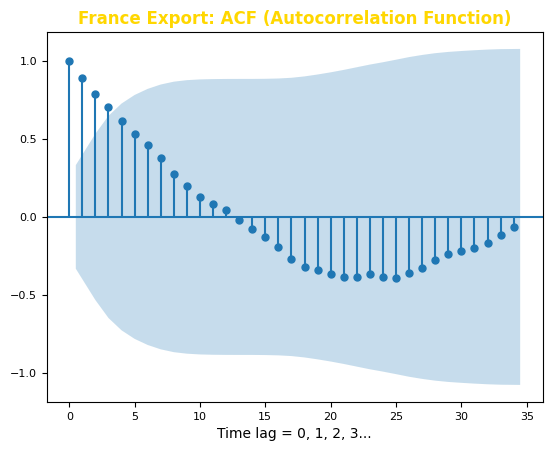

In [98]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_IE_model, lags=34);
plt.title("Ireland Export: ACF (Autocorrelation Function)",color='green',fontweight='bold',fontsize= 12)
plt.xlabel("Time lag = 0, 1, 2 ...", fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

plot_acf(df_FR_model, lags=34);
plt.title("France Export: ACF (Autocorrelation Function)",color='gold',fontweight='bold', fontsize= 12)
plt.xlabel("Time lag = 0, 1, 2, 3...", fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

Autocorrelation with various time lags can be seen in the plot above.
These time lags show, when its value is:
- 0: that it correlates with itself completely (as is shown by the perfect positive correlation +1.00 value for both graphs)
- 1: correlation is still strong (it depicts the difference of the first (i.e. 0) and its consecutive number, 1) 
- 4 and beyond, are inside the blue zone of the 95% confidence interval and as such are random in value, this makes the correlation `statistically insignificant`. This is true for both Ireland and France.

These graphs show a general situation about time lags, i.e. At the start there is a strong correlation present but as time progresses it gradually seizes. 

#### **` Calculating the Difference Order (d=N)`**

**ADF (Augmented Dickey-Fuller) Test**
I am using the popular ADF statistical significant test to check if the Time Series is stationary. For this I will do a hypothesis testing and with the resulting p-value acquired by the end, I will draw a conclusion on whether the time series is stationary or not. 

The null hypothesis assumes that unit-root is present (i.e. α=1), to be able to reject the null hypothesis the p-value has to be less than the significance level (e.g. 0.05). Which would mean that the time series is stationary.

1) First step, I will set up the hypothesis criteria:
- `H0` (null hypothesis): assume there is unit root in the time series and that it is non-stationary (p-value >= 0.05)<br>
- `HA` (alternate hypothesis): the time series has no unit root present and is trend stationary (p-value < 0.05)

2) Next using the ADF test I will see if the time series of Ireland and France are stationary or not.

In [99]:
from statsmodels.tsa.stattools import adfuller

def ADF_Test(series):
    result = adfuller(series, autolag='AIC')
    print("- ADF TEST --------------------------------------")
    #print(f'T={series.count()}')
    print(f'> ADF test statistic:       {result[0]}')
    print(f'> MacKinnons ~ p-value:      {result[1]}')
    print(f'> Lags Size used:            {result[2]}')

    print('\n- Critial Values --------------------------------')
    for key, value in result[4].items():
        if (key=="10%"): 
            print(f'>{key}  {value}')
        else: print(f'> {key}  {value}')

In [100]:
print("IRELAND:::")
ADF_Test(df_IE_model.Value)
print("\nFRANCE:::")
ADF_Test(df_FR_model.Value)

IRELAND:::
- ADF TEST --------------------------------------
> ADF test statistic:       -0.8952175230432053
> MacKinnons ~ p-value:      0.7895432757018561
> Lags Size used:            0

- Critial Values --------------------------------
> 1%  -3.639224104416853
> 5%  -2.9512301791166293
>10%  -2.614446989619377

FRANCE:::
- ADF TEST --------------------------------------
> ADF test statistic:       -1.6094850597838575
> MacKinnons ~ p-value:      0.4788272930929474
> Lags Size used:            0

- Critial Values --------------------------------
> 1%  -3.639224104416853
> 5%  -2.9512301791166293
>10%  -2.614446989619377


<u>For Ireland</u>:<br>
With a p-value of `0.7895432757018561` significant level (that is greater than 0.05), I accept the null-hypothesis and can conclude that Ireland's time series is non-stationary, that is covariance and mean is unchanging with the passing of time.

<u>For France</u>:<br>
With a p-value of `0.4788272930929474` significant level (that is less than 0.05), I reject the null-hypothesis and can conclude that France's time series is trend stationary, that is covariance and mean is change with the passing of time.

#### **`Ireland's Non-Stationary Time Series conversion`**

I will use differencing to convert the non-stationary Ireland time series data.

For this process I will use the first upto third order differencing. As for France, since its time series data is already in stationary form I will leave it as is.

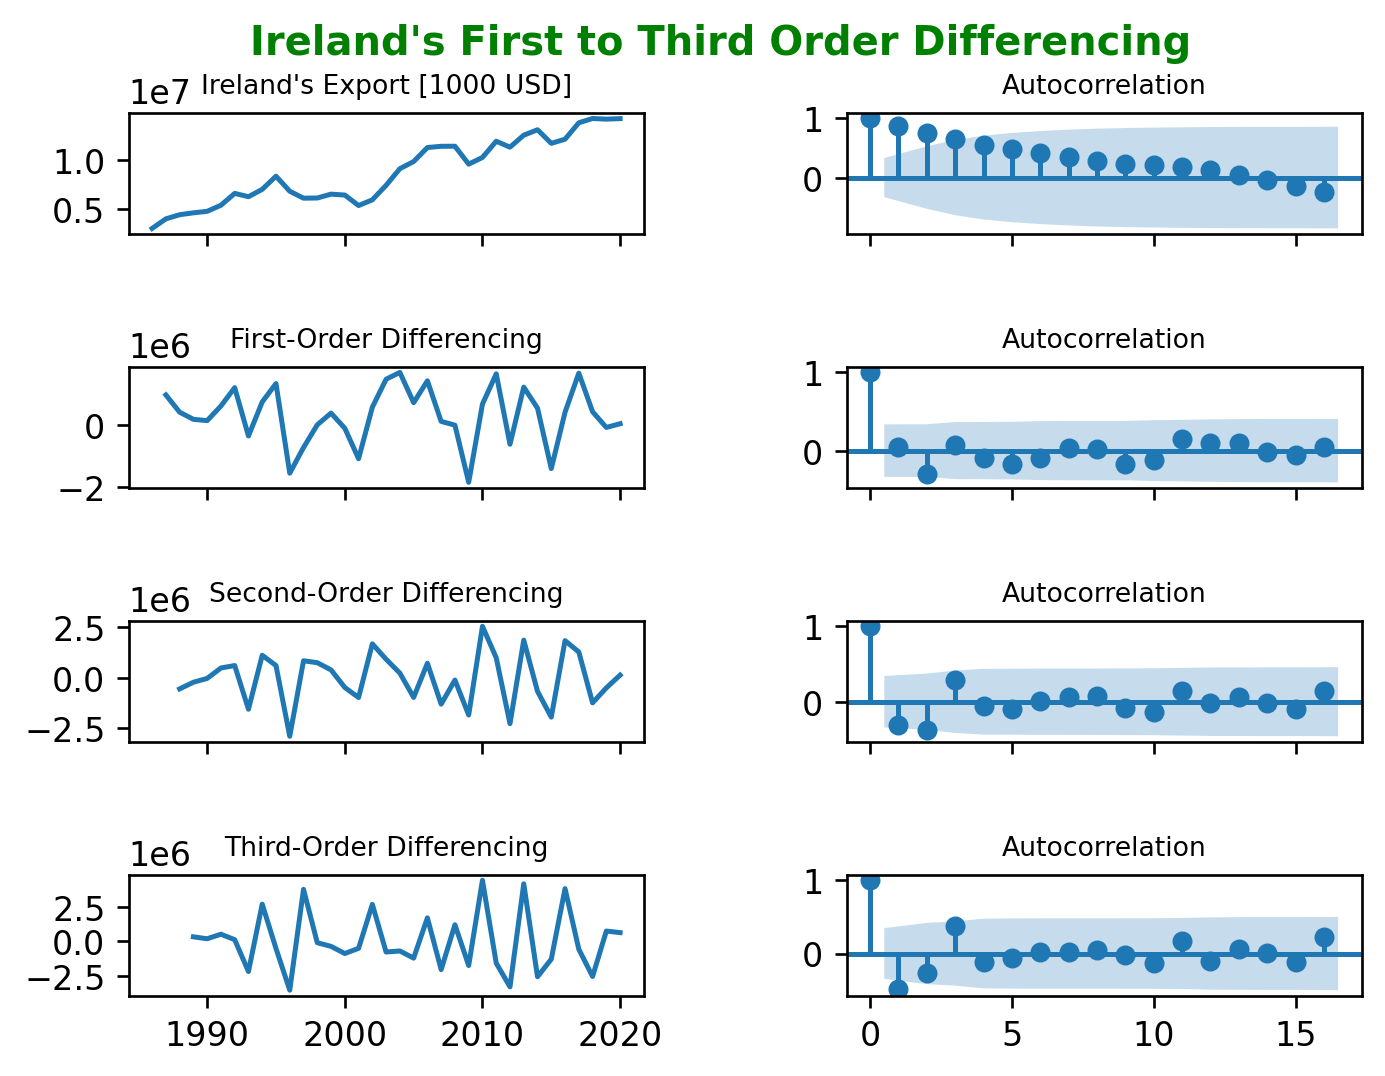

In [101]:
# First-Third Order Differencing
df_IE_model0 = df_IE_model.copy()
df_IE_model1 = df_IE_model.Value.diff()
df_IE_model2 = df_IE_model.Value.diff().diff()
df_IE_model3 = df_IE_model.Value.diff().diff().diff()

fig, axes = plt.subplots(4, 2, sharex="col")

fig.figsize=(60,120)
fig.dpi=240
fig.tight_layout(pad=3.0)

axes[0,0].set_title('Ireland\'s Export [1000 USD]',fontsize=8)
axes[0,0].plot(df_IE_model0.Value);

axes[1,0].set_title('First-Order Differencing',fontsize=8)
axes[1,0].plot(df_IE_model1)

axes[2,0].set_title('Second-Order Differencing',fontsize=8)
axes[2,0].plot(df_IE_model2)

axes[3,0].set_title('Third-Order Differencing',fontsize=8)
axes[3,0].plot(df_IE_model3)

plot_acf(df_IE_model0.Value, ax=axes[0,1])
axes[0,1].set_title('Autocorrelation',fontsize=8)

plot_acf(df_IE_model1.dropna(), ax=axes[1,1])
axes[1,1].set_title('Autocorrelation',fontsize=8)

plot_acf(df_IE_model2.dropna(), ax=axes[2,1])
axes[2,1].set_title('Autocorrelation',fontsize=8)

plot_acf(df_IE_model3.dropna(), ax=axes[3,1])
axes[3,1].set_title('Autocorrelation',fontsize=8)

#plt.subplot_tool()
fig.suptitle("Ireland's First to Third Order Differencing",color='green',fontweight='bold',fontsize=12)

plt.show()

As it can be seen in the Autocorrelation plots above that the first-order differencing is valid with values falling into the 95% confidence interval.
But the second- and third-order differencing are inconsistent with falling outside the 95% confidence interval and regularly altering its sign from positive to negative and vice versa. This seems to mean the time series data is too differentiated.<br>
Alas, for a proper conclusion, ADF Test is required on the first-, second-, and third-order differencing data.

In [102]:
#warnings.filterwarnings("ignore")
print("First-Order Differencing: ")
ADF_Test(df_IE_model1.dropna())

print("\nSecond-Order Differencing: ")
ADF_Test(df_IE_model2.dropna())

print("\nThird-Order Differencing: ")
ADF_Test(df_IE_model3.dropna())

First-Order Differencing: 
- ADF TEST --------------------------------------
> ADF test statistic:       -5.323806719384915
> MacKinnons ~ p-value:      4.886967769700068e-06
> Lags Size used:            0

- Critial Values --------------------------------
> 1%  -3.6461350877925254
> 5%  -2.954126991123355
>10%  -2.6159676124885216

Second-Order Differencing: 
- ADF TEST --------------------------------------
> ADF test statistic:       -7.7387564677979075
> MacKinnons ~ p-value:      1.0759384675985593e-11
> Lags Size used:            1

- Critial Values --------------------------------
> 1%  -3.661428725118324
> 5%  -2.960525341210433
>10%  -2.6193188033298647

Third-Order Differencing: 
- ADF TEST --------------------------------------
> ADF test statistic:       -5.236778007999011
> MacKinnons ~ p-value:      7.3927010694990616e-06
> Lags Size used:            3

- Critial Values --------------------------------
> 1%  -3.6889256286443146
> 5%  -2.9719894897959187
>10%  -2.625295765

The above ADF Test proves that the First-Order Differencing is enough. Since its p-value of `4.886967769700068e-06`, ~0, which is less than 0.05. That said, the null hypothesis can be rejected. As with First-Order Differencing (d=1), the time series data has become stationary and perfect for modelling. So no need to check the other differencing orders. 

**`AR Term order (p) calculation with PACF (Partial Autocorrelation Function)`**<br><br>
Generally, the smallest value of of AIC(Akaike Information Criteria) and  BIC(Bayesian Information Criteria) is the aim when choosing appropriate AR(AutoRegressive model) order (p) and MA(Moving Average) Term (q) values for the model. Smaller value means simpler process (optimal: <3).

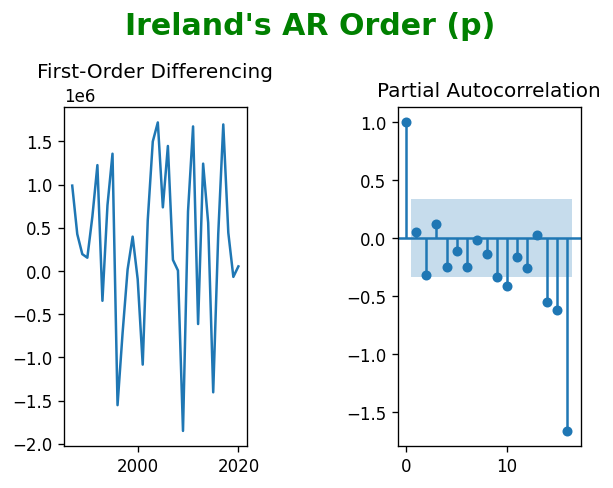

In [103]:
fig, axes = plt.subplots(1, 2, sharex=False)

fig.figsize=(20,30)
fig.dpi=120
fig.tight_layout(pad=6.0)

#fig.figsize=(60,120)
#fig.dpi=240
#fig.tight_layout(pad=6.0)

plt.suptitle("Ireland's AR Order (p)",color='green',fontweight='bold',fontsize=18)
axes[0].plot(df_IE_model1); axes[0].set_title('First-Order Differencing')
plot_pacf(df_IE_model1.dropna(), ax=axes[1])
plt.show()

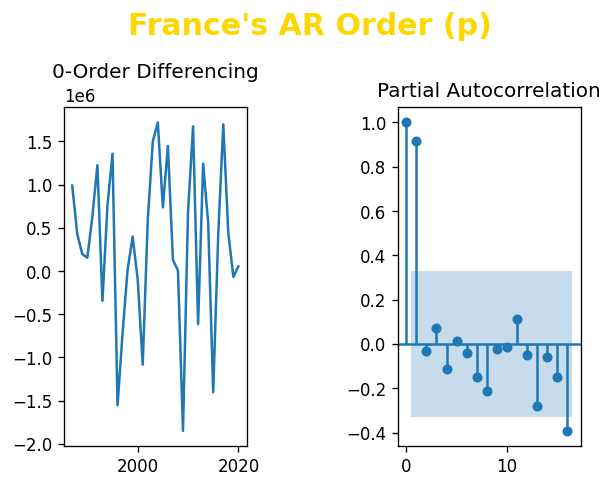

In [104]:
fig, axes = plt.subplots(1, 2, sharex=False)

fig.figsize=(20,30)
fig.dpi=120
fig.tight_layout(pad=6.0)

plt.suptitle("France's AR Order (p)",color='gold',fontweight='bold',fontsize=18)
axes[0].plot(df_IE_model1); axes[0].set_title('0-Order Differencing')
plot_pacf(df_FR_model.dropna(), ax=axes[1])

plt.show()

**`MA Term order (q) calculation with ACF (Autocorrelation Function)`**

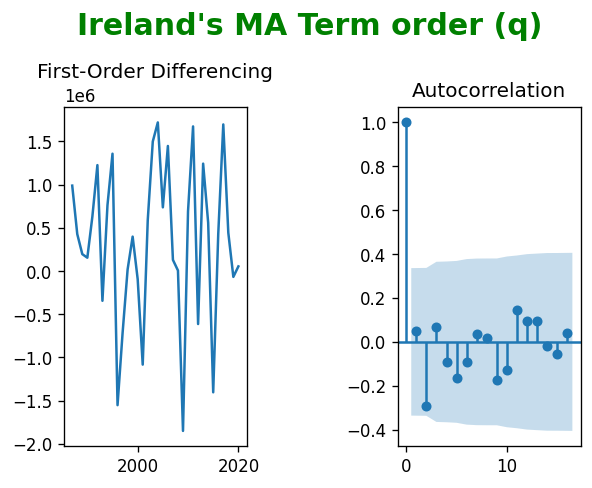

In [105]:
fig, axes = plt.subplots(1,2, sharex=False)

fig.figsize=(20,30)
fig.dpi=120
fig.tight_layout(pad=6.0)

plt.suptitle("Ireland's MA Term order (q)",color='green',fontweight='bold',fontsize=18)
axes[0].plot(df_IE_model1)
axes[0].set_title('First-Order Differencing')
plot_acf(df_IE_model1.dropna(),ax=axes[1])
plt.show()

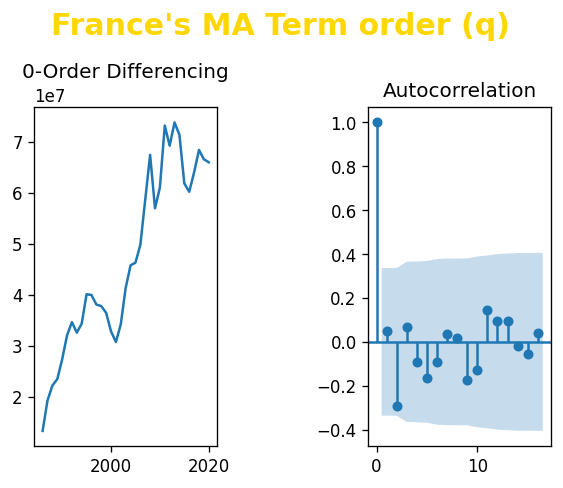

In [106]:
fig, axes = plt.subplots(1,2, sharex=False)

fig.figsize=(20,30)
fig.dpi=120
fig.tight_layout(pad=6.0)

plt.suptitle("France's MA Term order (q)",color='gold',fontweight='bold',fontsize=18)
axes[0].plot(df_FR_model)
axes[0].set_title('0-Order Differencing')
plot_acf(df_IE_model1.dropna(),ax=axes[1])
plt.show()

The plots of PACF and ACF prove that the model should have starting value of p=0 and q=0 as these are the first and/or only values not in the 95% confidence interval (for both Ireland and France).

#### **` Ireland: Auto ARIMA model for First-Order Difference (d=1)`** 

In [107]:
#pm.auto_arima??

In [108]:
import pmdarima as pm

Diff_order_d = 1
AR_p  = 0
#MA_q

series_frequency = 1

model_diff1 = pm.auto_arima(df_IE_model.dropna(), 
                          test='adf',         # ADF TEST
                          start_p=1, max_p=4, # p:[1-4]
                          start_q=1, max_q=4, # q:[1-4]
                          
                          d=Diff_order_d,
                          start_P=AR_p,
                          
                          m=series_frequency,
                          seasonal=False,     # non-seasonal (i.e. annual not monthly data)
                          
                          D=0,
                          trace=True,
                          error_action='ignore',
                          suppress_warnings=True,
                          stepwise=True)

print(model_diff1.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1035.688, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1033.959, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1035.622, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1035.540, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1036.214, Time=0.00 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.060 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   35
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -514.980
Date:                Sat, 07 Jan 2023   AIC                           1033.959
Time:                        21:41:32   BIC                           1037.012
Sample:                             0   HQIC                          1035.000
                                 - 35                                       

#### **` Optimal Model for First-Order:`** 
After testing it seems the best Auto Arimas is the one with (the smallest AIC value):

>`ARIMA(0,1,0)(0,0,0)             : AIC=1033.959, BIC=1037.012 Time=0.01 sec`

with order: (0,1,0)

- p=0
- D=1
- q=0

#### **` Ireland: Auto ARIMA model for Second-Order Difference (d=2)`** 

In [109]:
# AUTO ARIMA model test (d=2)

Diff_order_d = 2
AR_p  = 0
#MA_q

series_frequency = 1

model_diff2 = pm.auto_arima(df_IE_model.dropna(), 
                          test='adf',               # ADF TEST
                          start_p=1, max_p=4,       # p:[1-4]
                          start_q=1, max_q=4,       # q:[1-4]
                          
                          m=series_frequency,
                          seasonal=False,           # non-seasonal (i.e. annual not monthly data)
                          
                          d=Diff_order_d,
                          start_P=AR_p,
                          
                          D=0,
                          trace=True,
                          error_action='ignore',
                          suppress_warnings=True,
                          stepwise=True)

print(model_diff2.summary())

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=1015.866, Time=0.02 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=1025.477, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=1024.679, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=1014.411, Time=0.02 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1023.551, Time=0.00 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=1013.928, Time=0.02 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=1013.121, Time=0.03 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=1014.393, Time=0.05 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=1016.569, Time=0.03 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=1015.320, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=1013.557, Time=0.04 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=1015.533, Time=0.11 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=1011.233, Time=0.02 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=1011.705, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0]          

#### **` Optimal Model:`** 
After testing it seems the best Auto Arimas is the one with (the smallest AIC value):

>`ARIMA(0,2,3)(0,0,0)             : AIC=1010.572, BIC=1016.558 Time=0.03 sec`

with order: (0,2,3)

- p=0
- d=2
- q=3
<hr>

**Overall Optimal Model:** <br>
<pre>
<b>ARIMA</b> |  (0, 1, 0)  |  (0, 2, 3)  |
<b>AIC</b>   |   1033.959  |   1010.572  |   
<b>BIC</b>   |   1037.012  |   1016.558  |   
<b>HQIC</b>  |   1035.000  |   1012.586  |                      
</pre>

Based on First and Second-Order Auto Arimas, the best order is (0,2,3) where
- p=0
- d=2
- q=3

Which has a better fit, accuracy and a smaller AIC and BIC value.

### Auto ARIMA model's residual interpretation

#### **` Ireland: Residual Interpretation for First-Order Difference (d=1)`** 

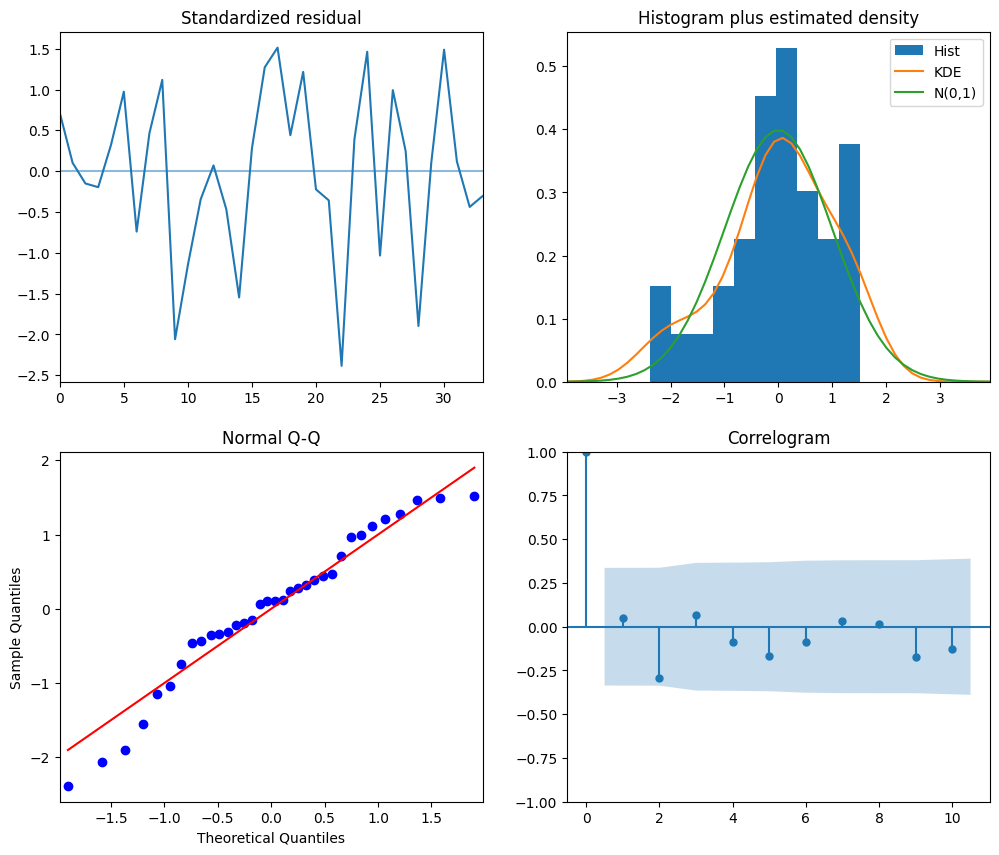

In [110]:
model_diff1.plot_diagnostics(figsize=(12,10))
plt.show()

#### **` Ireland: Residual Interpretation for Second-Order Difference (d=2)`** 

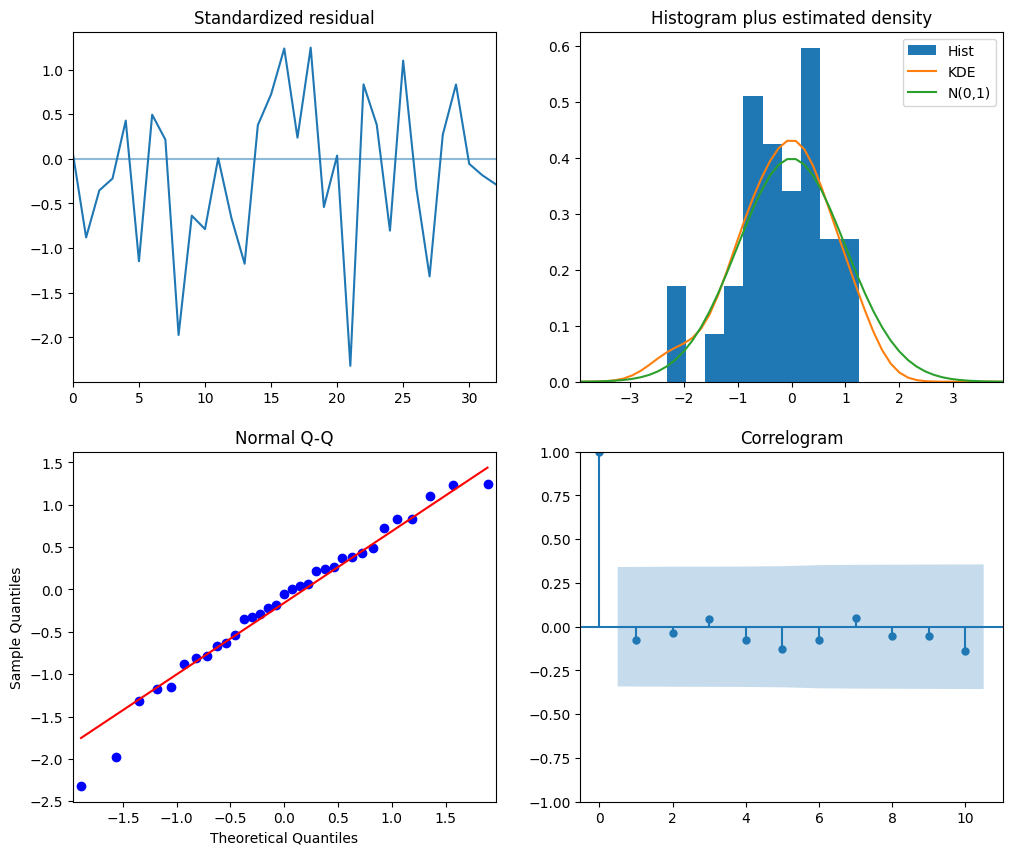

In [111]:
model_diff2.plot_diagnostics(figsize=(12,10))
plt.show()

## ARIMA TEST

#### **` Ireland: ARIMA Model (d=2)`** 

In [112]:
# NEWEST VERSION: Please uncomment if error in the below code
!pip install statsmodels==0.12.2

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                   35
Model:                 ARIMA(0, 2, 3)   Log Likelihood                -501.286
Date:                Sat, 07 Jan 2023   AIC                           1010.572
Time:                        21:44:44   BIC                           1016.558
Sample:                             0   HQIC                          1012.586
                                 - 35                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7517      0.352     -2.135      0.033      -1.442      -0.062
ma.L2         -0.4957      0.314     -1.580      0.114      -1.110       0.119
ma.L3          0.2809      0.249      1.129      0.2

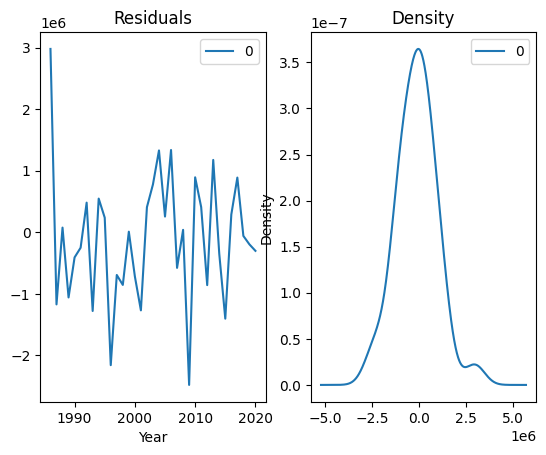

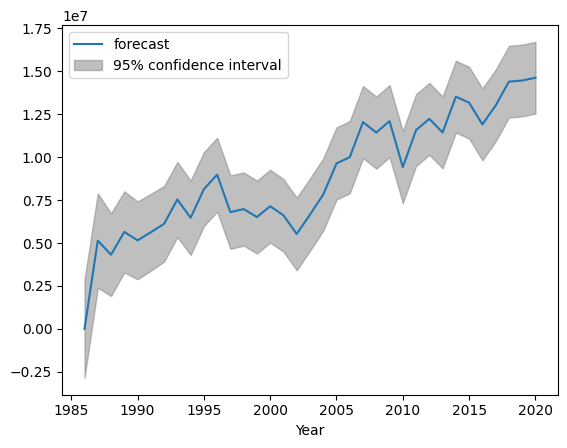

In [114]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

# CONTROL TEST - ARIMA(p=0,d=2,q=3) Model Creation
model_IE_023 = ARIMA(df_IE_model.Value, order=(0,2,3))
model_IE=model_IE_023
model_IE_fit = model_IE.fit()#disp=0)
print(model_IE_fit.summary())

# RESIDUAL ERROR PLOTTING
fig.figsize=(20,5)
fig.dpi=220

residuals = pd.DataFrame(model_IE_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
#plt.show()

# ACTUAL vs FITTED VALUE
plot_predict(model_IE_fit, dynamic=False)#,plot_insample=True)
plt.show()

In [115]:
#plot_predict??

#### **` France: ARIMA Model (d=0)`** 

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                   35
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -589.464
Date:                Sat, 07 Jan 2023   AIC                           1186.929
Time:                        21:44:47   BIC                           1193.150
Sample:                             0   HQIC                          1189.076
                                 - 35                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        4.66e+07   1.83e-10   2.55e+17      0.000    4.66e+07    4.66e+07
ar.L1          0.9055      0.082     11.104      0.000       0.746       1.065
ma.L1          0.8812      0.091      9.728      0.0

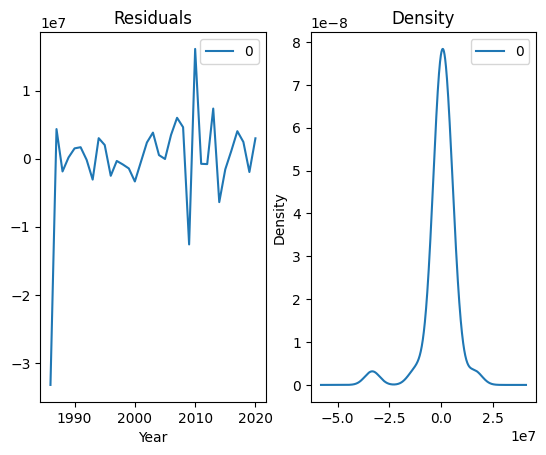

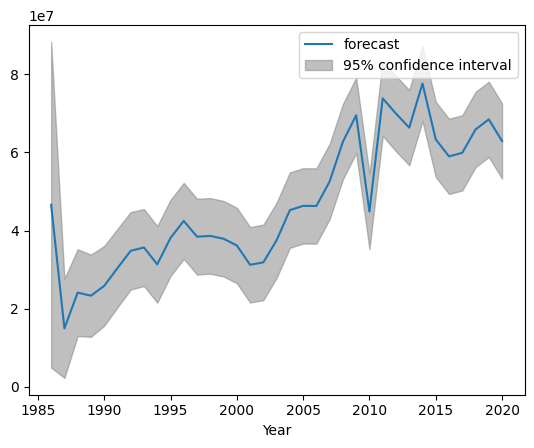

In [116]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

# CONTROL TEST - ARIMA(p=1,d=0,q=1) Model Creation 
model_FR_101 = ARIMA(df_FR_model.Value, order=(1,0,1))
model_FR=model_FR_101
model_FR_fit = model_FR.fit()#disp=0)
print(model_FR_fit.summary())

# RESIDUAL ERROR PLOTTING
fig.figsize=(20,5)
fig.dpi=220

residuals = pd.DataFrame(model_FR_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
#plt.show()

# ACTUAL vs FITTED VALUE
plot_predict(model_FR_fit, dynamic=False)#,plot_insample=True)
plt.show()

## Ireland\'s Trade Prediction for the next 20 years
Since the data only spans until 2020, the prediction starts from 2021 up to 2041. 

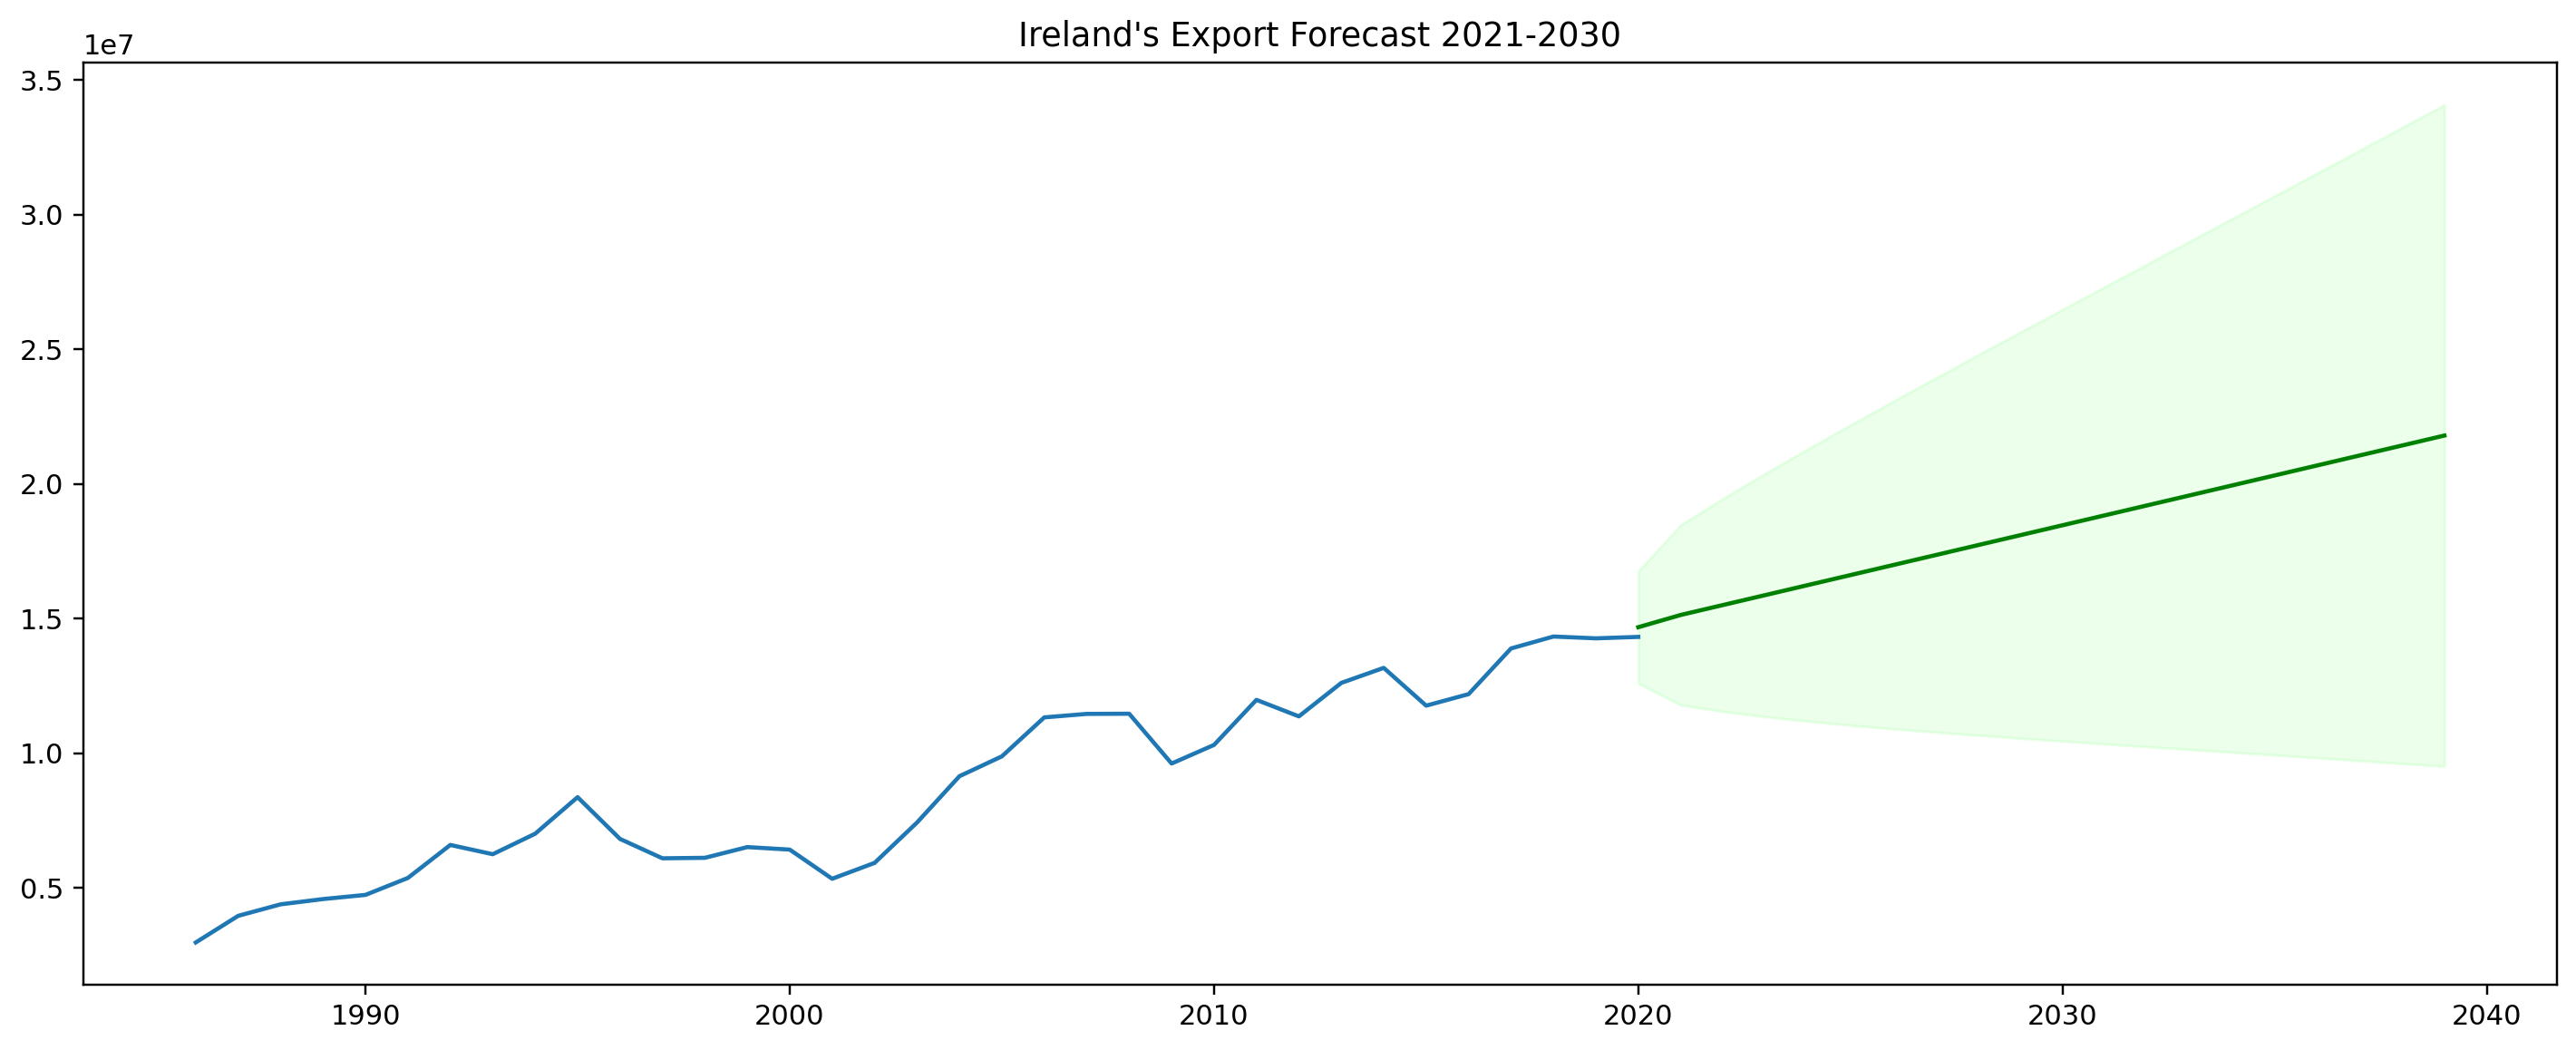

In [117]:
# Forecast
n_periods = 20
fc, confint = model_diff2.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(df_IE_model.index.max(), df_IE_model.index.max()+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc.values, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Prediction
plt.rcParams.update({'figure.figsize':(16,6), 'figure.dpi':220})
plt.plot(df_IE_model.Value)
plt.plot(fc_series, color='green')

# Confidence Intervals
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='lime', alpha=.08)

plt.title("Ireland\'s Export Forecast 2021-2030")
plt.show()

In [118]:
# The Prediction Of Ireland's Trade
pd.concat([lower_series.rename('Lower'), fc_series.rename('Prediction'),upper_series.rename('Upper')], axis=1)

Lower  Prediction       Upper
2020 12597746.87 14685073.54 16772400.22
2021 11792510.30 15139652.40 18486794.51
2022 11552004.40 15509784.88 19467565.36
2023 11356455.59 15879917.36 20403379.14
2024 11189800.48 16250049.84 21310299.21
2025 11042817.28 16620182.32 22197547.36
2026 10909684.83 16990314.80 23070944.78
2027 10786481.44 17360447.28 23934413.12
2028 10670436.59 17730579.76 24790722.93
2029 10559520.82 18100712.24 25641903.67
2030 10452204.60 18470844.72 26489484.84
2031 10347308.49 18840977.20 27334645.92
2032 10243905.68 19211109.68 28178313.69
2033 10141256.43 19581242.16 29021227.89
2034 10038762.47 19951374.64 29863986.81
2035  9935934.49 20321507.12 30707079.76
2036  9832368.44 20691639.60 31550910.76
2037  9727727.93 21061772.08 32395816.23
2038  9621730.92 21431904.56 33242078.20
2039  9514139.44 21802037.04 34089934.64

## France\'s Trade Prediction for the next 20 years
Since the data only spans until 2020, the prediction starts from 2021 up to 2041. 

In [119]:
# FRANCE: AUTO ARIMA model test (d=0)
Diff_order_d = 0
AR_p  = 0
#MA_q
series_frequency = 1
model_FR_diff0 = pm.auto_arima(df_IE_model.dropna(), 
                          test='adf',               # ADF TEST
                          start_p=1, max_p=4,       # p:[1-4]
                          start_q=1, max_q=4,       # q:[1-4]                          
                          m=series_frequency,
                          seasonal=False,           # non-seasonal (i.e. annual not monthly data)                          
                          d=Diff_order_d,
                          start_P=AR_p,                          
                          D=0,
                          trace=True,
                          error_action='ignore',
                          suppress_warnings=True,
                          stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1073.749, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1225.516, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1206.498, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1073.270, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1075.115, Time=0.04 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1075.183, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1073.755, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=1076.429, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1073.841, Time=0.04 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0]          
Total fit time: 0.369 seconds


In [120]:
#fc.values

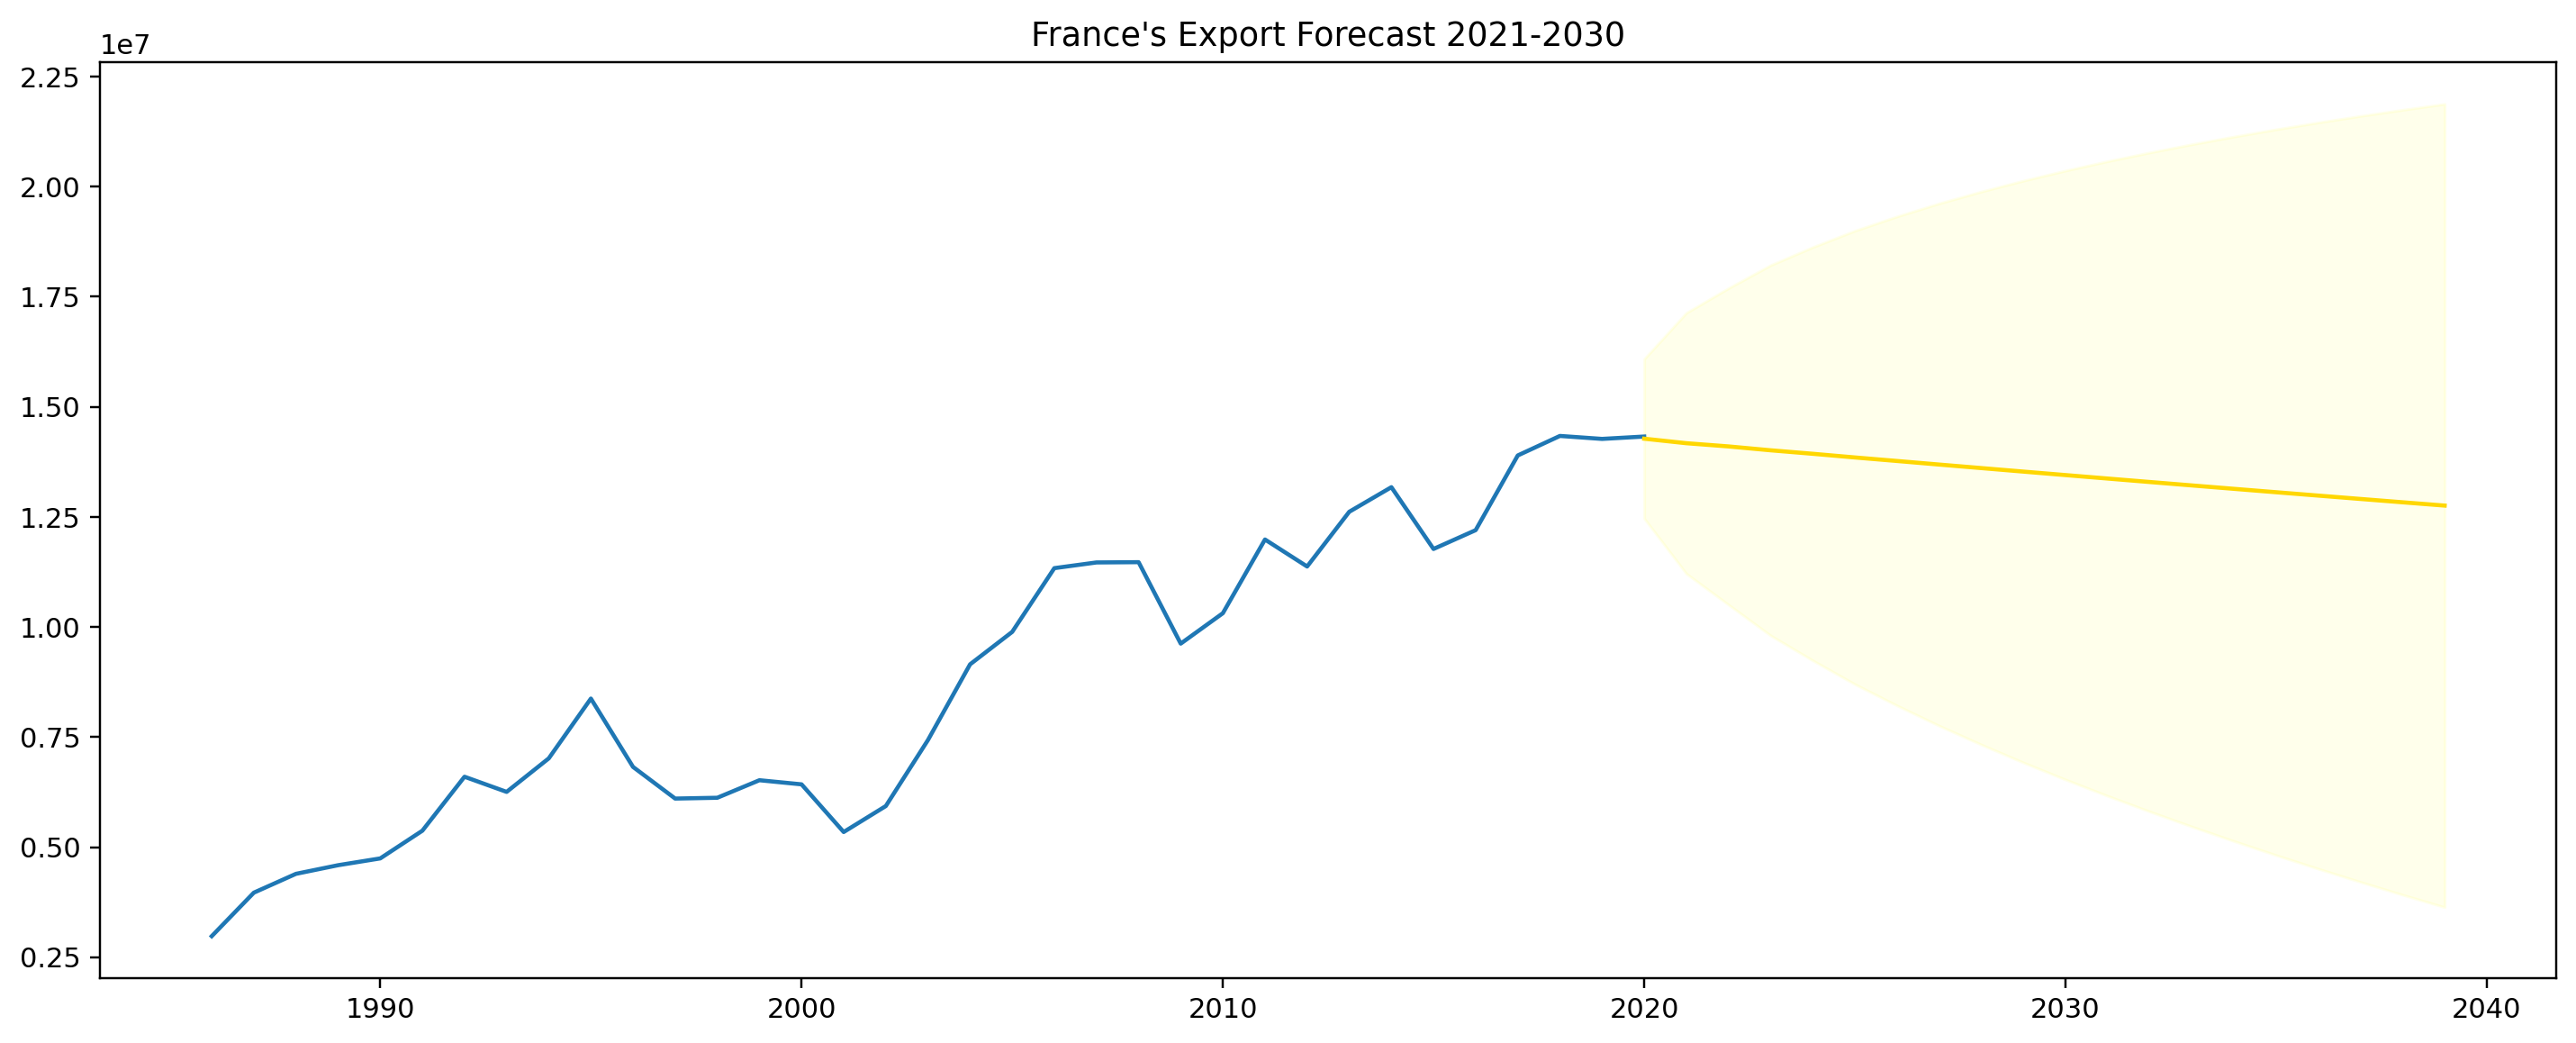

In [121]:
# Forecast
n_periods = 20
fc, confint = model_FR_diff0.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(df_FR_model.index.max(), df_FR_model.index.max()+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc.values, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Prediction
plt.rcParams.update({'figure.figsize':(16,6), 'figure.dpi':220})
plt.plot(df_IE_model.Value)
plt.plot(fc_series, color='gold')

# Confidence Intervals
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='yellow', alpha=.08)

plt.title("France\'s Export Forecast 2021-2030")
plt.show()

In [122]:
# The Prediction Of Frances's Trade
pd.concat([lower_series.rename('Lower'), fc_series.rename('Prediction'),upper_series.rename('Upper')], axis=1)

Lower  Prediction       Upper
2020 12464758.99 14276364.27 16087969.55
2021 11211147.71 14173609.59 17136071.47
2022 10506544.42 14100914.89 17695285.35
2023  9807010.34 14012656.66 18218302.97
2024  9239956.15 13933594.64 18627233.13
2025  8700547.74 13850285.02 19000022.31
2026  8215765.24 13770020.66 19324276.09
2027  7756995.75 13688838.70 19620681.66
2028  7328604.64 13608885.85 19889167.07
2029  6921105.23 13528992.61 20136879.98
2030  6534009.71 13449789.51 20365569.31
2031  6163428.47 13370930.06 20578431.65
2032  5808123.45 13292598.14 20777072.83
2033  5466108.27 13214689.75 20963271.24
2034  5136264.37 13137257.18 21138250.00
2035  4817379.09 13060267.92 21303156.75
2036  4508571.48 12983735.50 21458899.51
2037  4209008.56 12907648.48 21606288.39
2038  3918011.42 12832009.01 21746006.59
2039  3634965.58 12756811.89 21878658.19

## `Prediction Conclusion`

France and Ireland's export volume seems to indicate a contrasting trend. Even though they are both members of the EU and affected by EU's CAP (Common agricultural policy), this change in the market seems to predict a positive effect on the Irish exports while a negative impact on the French. This could be caused by France already having a stable market for its exports and Ireland still gaining theirs (or acquiring from France). Since EU Cap is focused on making an equal market possible, this could mean that some French partners are migrated to Irish ones to support them equally.

# ML on Cattle Meat
I will do an analysis on Cattle Meat as its Ireland's top product that has the largest export value.

In [123]:
df[(df.Country == 'Ireland') & (df.Element=='Export Value')].nlargest(n=10, columns='Value')#.sort_values(by=['Value']).tail(10)

Country                                            Partner  \
1393615  Ireland  United Kingdom of Great Britain and Northern I...   
1393613  Ireland  United Kingdom of Great Britain and Northern I...   
1393623  Ireland  United Kingdom of Great Britain and Northern I...   
1393609  Ireland  United Kingdom of Great Britain and Northern I...   
1393620  Ireland  United Kingdom of Great Britain and Northern I...   
481824   Ireland                                            Germany   
1393590  Ireland  United Kingdom of Great Britain and Northern I...   
1393601  Ireland  United Kingdom of Great Britain and Northern I...   
1393606  Ireland  United Kingdom of Great Britain and Northern I...   
1483889  Ireland                           United States of America   

                                                      Item       Element  \
1393615          Meat of cattle boneless, fresh or chilled  Export Value   
1393613          Meat of cattle boneless, fresh or chilled  Export Value   
1393623          Meat of cattle boneless, fresh or chilled  Export Value   
1393609          Meat of cattle boneless, fresh or chilled  Export Value   
1393620          Meat of cattle boneless, fresh or chilled  Export Value   
481824                            Food preparations n.e.c.  Export Value   
1393590          Meat of cattle boneless, fresh or chilled  Export Value   
1393601          Meat of cattle boneless, fresh or chilled  Export Value   
1393606          Meat of cattle boneless, fresh or chilled  Export Value   
1483889  Undenatured ethyl alcohol of an alcoholic stre...  Export Value   

         Year      Value Alpha3  
1393615  2018 1035330.00    GBR  
1393613  2017  935158.00    GBR  
1393623  2020  907457.00    GBR  
1393609  2016  870864.00    GBR  
1393620  2019  819525.00    GBR  
481824   1995  810480.00    DEU  
1393590  2011  775537.00    GBR  
1393601  2014  766342.00    GBR  
1393606  2015  764228.00    GBR  
1483889  2019  762605.00    USA

In [124]:
df_ML = df[(df.Country == 'Ireland') & (df.Element=='Export Value') & (df.Item =='Meat of cattle boneless, fresh or chilled')].reset_index(drop=True)
df_ML.drop(['Country','Item','Element','Alpha3','Partner'],axis=1, inplace=True)

In [125]:
df_ML

Year  Value
0     1991  55.00
1     1996 246.00
2     1990 517.00
3     1992  71.00
4     1994  87.00
...    ...    ...
1807  2001  40.00
1808  2002 148.00
1809  2003  35.00
1810  2012 170.00
1811  1996  30.00

[1812 rows x 2 columns]

In [126]:
df_ML = df_ML.groupby(['Year']).Value.sum().reset_index(drop=False)
#df_ML = pd.DataFrame(df_ML.groupby('Year','Partner').Value.sum(), columns=['Value'])

In [127]:
target_column = ['Value']
predictor = ['Year']#,'Partner']#.index

In [130]:
from sklearn.model_selection import train_test_split
X = df_ML[predictor].values
y = df_ML[target_column].values

#features_train, features_test, target_train and target_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)
print(X_train.shape)
print(X_test.shape)

(28, 1)
(7, 1)


LR: 0.777010 (0.180469)
LR: -4.713367 (2.724546)
NN: -0.268496 (0.265778)
KNN: 0.754484 (0.191584)
RF: 0.862855 (0.156603)
SVR: -0.714460 (0.971201)
LDA: nan (nan)
KNN-C: -0.555350 (1.391203)
CART: 0.855771 (0.096313)
NB: 0.855771 (0.096313)
SVM: 0.867486 (0.103028)


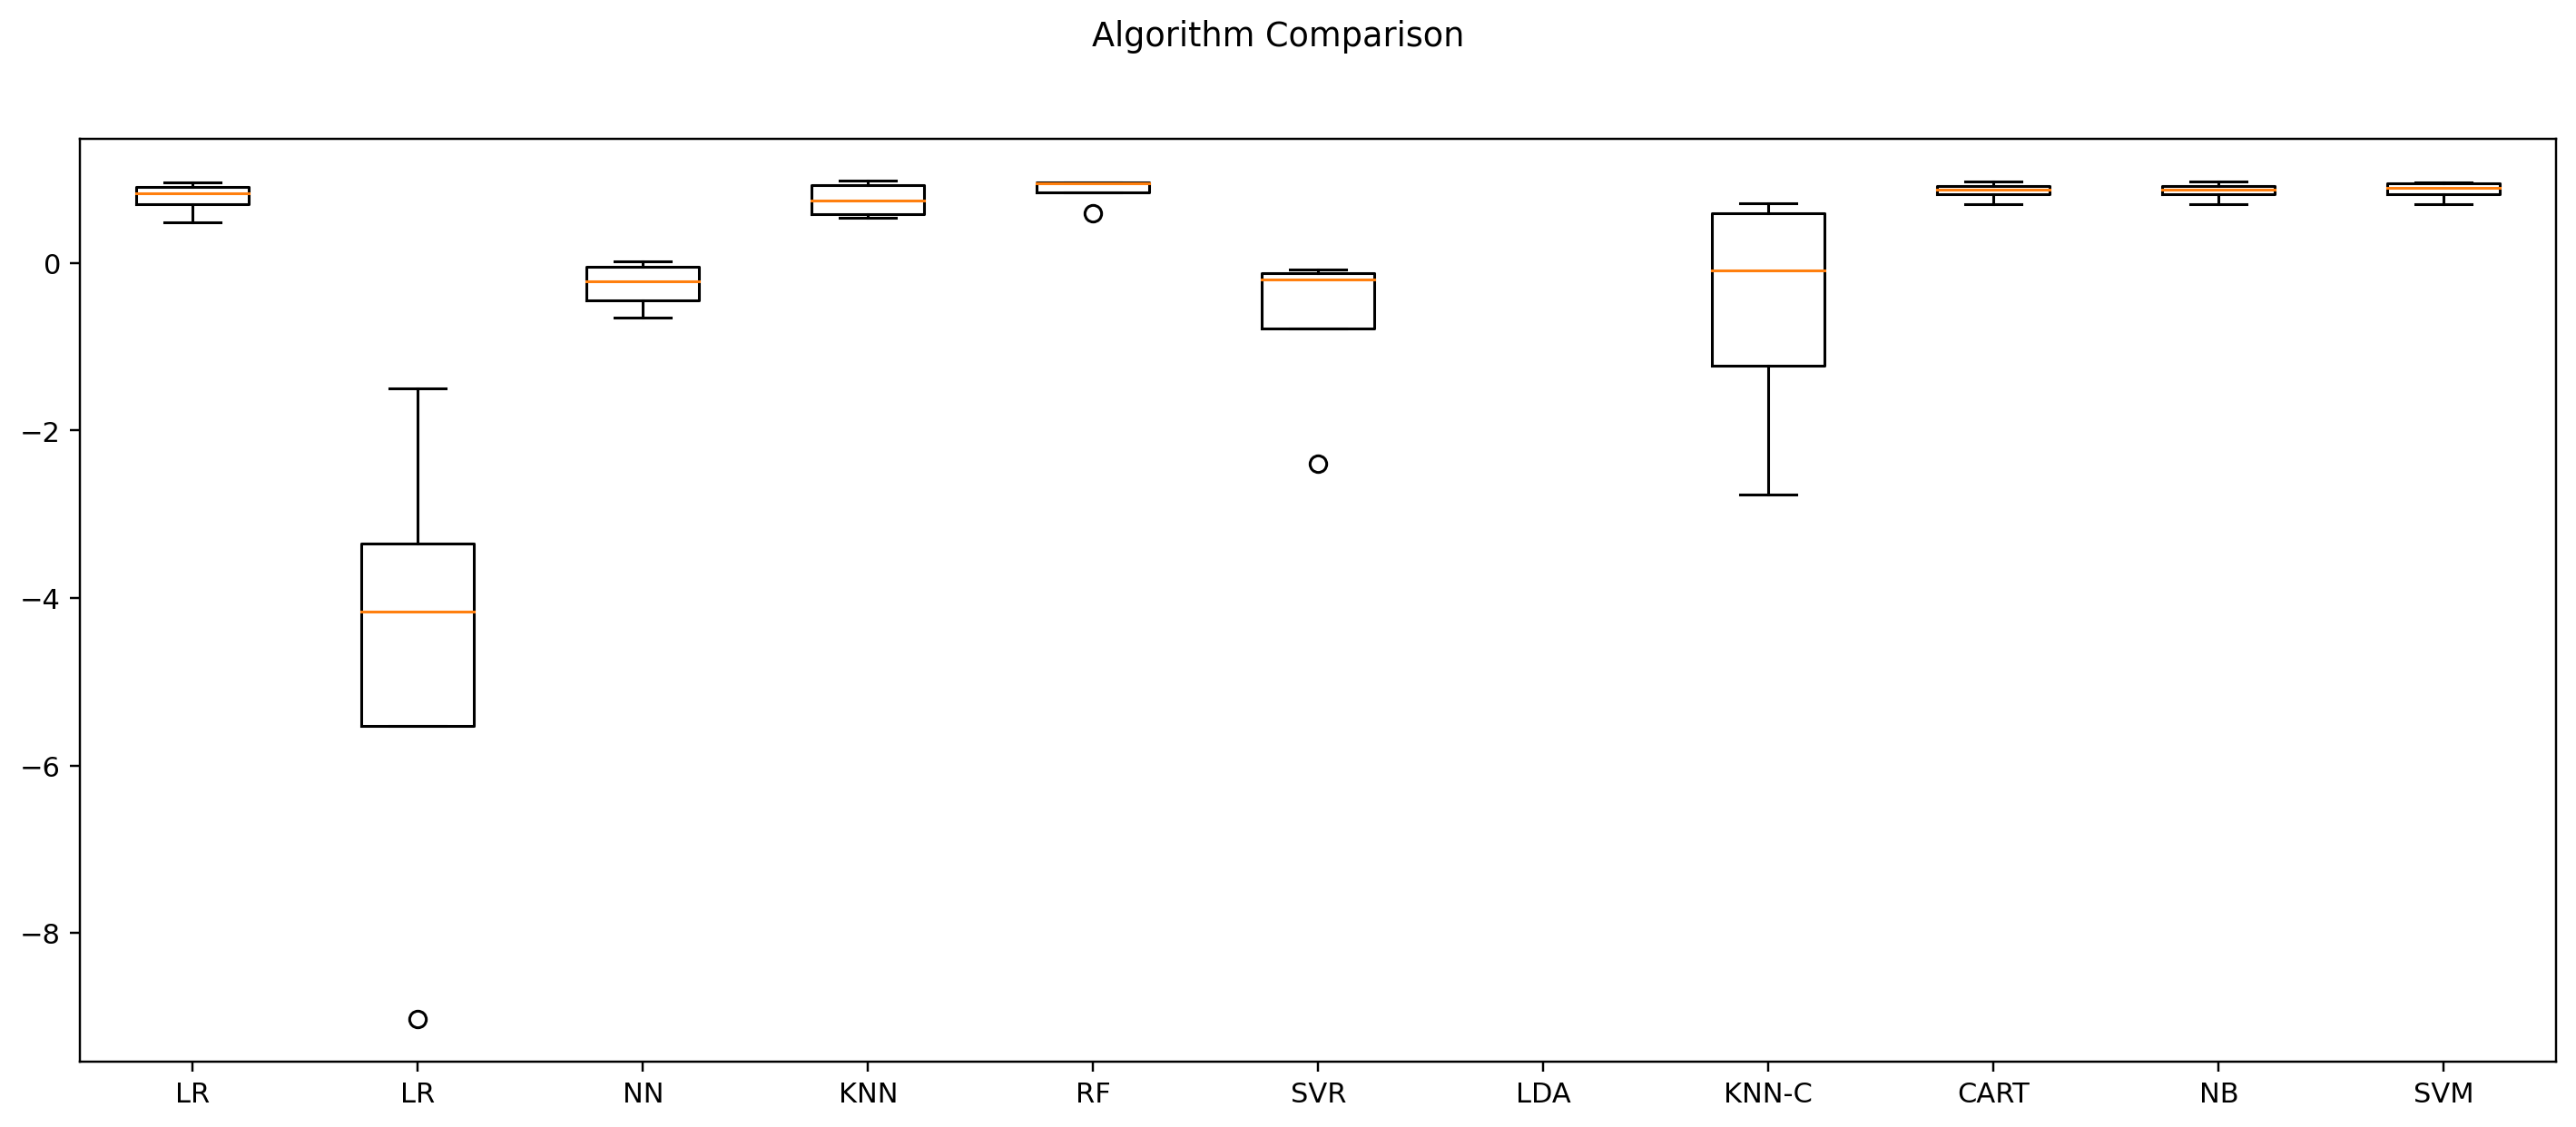

In [131]:
import sklearn as sk
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import svm
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures

models = []
models.append(('LR', LinearRegression()))
models.append(('LR', LogisticRegression()))
models.append(('NN', MLPRegressor(solver = 'lbfgs')))  #neural network
models.append(('KNN', KNeighborsRegressor())) 
models.append(('RF', RandomForestRegressor(n_estimators = 10))) # Ensemble method - collection of many decision trees
models.append(('SVR', SVR(gamma='auto'))) # kernel = linear
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN-C', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    # TimeSeries Cross validation
    tscv = TimeSeriesSplit(n_splits=4)
    cv_results = cross_val_score(model, X_train, y_train, cv=tscv, scoring='r2')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Based on the test done above, it becomes clear that the best performing ML model is `RF (Random Forest)` with a whopping **86.7664%**, the highest of all the other algorithms to find the top product (i.e. Cattle Meat)'s annual export value. Since there was only one significant feature (i.e. Value) for the analysis, I won't perform a feature significant testing.

## `Dashboard of Ireland's Global Trade`

In [132]:
# ImportError: cannot import name 'escape' from 'jinja2' (Please uncomment below)
#!pip install Flask==2.1.0

In [133]:
####### CONTINUES TO RUN!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# DASHBOARD
import plotly.graph_objects as go

import dash
import dash_core_components as dcc
import dash_html_components as html

app = dash.Dash()
app.layout = html.Div([
    html.H1("Ireland's Global Trade", style={'textAlign': 'center','color': 'gold', 'fontSize': 40}),
    dcc.Graph(figure=fig_IE_E_V),
    dcc.Graph(figure=fig_IE_I_V),
    dcc.Graph(figure=fig_IE_B_V)
])

app.run_server(debug=True, use_reloader=False)  # Turn off reloader if inside Jupyter

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
